# 【問題1】コンペティション内容の把握

- このコンペティションでは何を予測する？目的変数は？
- 企業がこのコンペティションを開催することで得られるメリットは？
- データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？

- ターゲットは住宅ローンの債務不履行になった人を予測する
- 列名はTARGET
- 企業側のメリットとしては、顧客を審査する際の基準等がわかる。
- 予測結果に影響してきそうなことは、収入、現在の雇用形態、家族の形態、年齢
- 他社の信用情報に傷がついている人

# 【問題2】データの概観

In [71]:
# インポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import missingno
%matplotlib inline
import seaborn as sns
pd.options.display.precision = 4
pd.options.display.float_format = '{:.3f}'.format

In [122]:
# データの読み込み
df = pd.read_csv('application_train.csv')
df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
6           100009       0         Cash loans           F            Y   
7           100010       0         Cash loans           M            Y   
8           100011       0         Cash loans           F            N   
9           100012       0    Revolving loans           M            N   
10          100014       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
12          100016       0         Cash loans           F            N   
13          100017       0         Cash loans           M            Y   
14          100018       0         Cash loans           F            N   
15          100019       0         Cash loans           M            Y   
16          100020       0         Cash loans           M            N   
17          100021       0    Revolving loans           F            N   
18          100022       0    Revolving loans           F            N   
19          100023       0         Cash loans           F            N   
20          100024       0    Revolving loans           M            Y   
21          100025       0         Cash loans           F            Y   
22          100026       0         Cash loans           F            N   
23          100027       0         Cash loans           F            N   
24          100029       0         Cash loans           M            Y   
25          100030       0         Cash loans           F            N   
26          100031       1         Cash loans           F            N   
27          100032       0         Cash loans           M            N   
28          100033       0         Cash loans           M            Y   
29          100034       0    Revolving loans           M            N   
...            ...     ...                ...         ...          ...   
307481      456225       1         Cash loans           M            N   
307482      456226       0         Cash loans           F            Y   
307483      456227       0         Cash loans           F            N   
307484      456228       0         Cash loans           F            Y   
307485      456229       0    Revolving loans           F            N   
307486      456230       0         Cash loans           F            Y   
307487      456231       0         Cash loans           M            N   
307488      456232       0         Cash loans           F            N   
307489      456233       1         Cash loans           F            N   
307490      456234       0         Cash loans           M            N   
307491      456235       0         Cash loans           M            Y   
307492      456236       0         Cash loans           M            Y   
307493      456237       0         Cash loans           F            N   
307494      456238       0         Cash loans           M            Y   
307495      456239       0         Cash loans           M            Y   
307496      456240       0    Revolving loans           F            N   
307497      456241       0         Cash loans           F            Y   
307498      456242       0         Cash loans           M            Y   
307499      456243       0         Cash loans           F            N   
307500      456244       0         Cash loans           F            N   
307501      456245       0         Cash loans           F            N   
307502      456246       0         Cash loans           F            N   
307503      

In [4]:
testdf = pd.read_csv('application_test.csv')
testdf

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
5          100042         Cash loans           F            Y               Y   
6          100057         Cash loans           M            Y               Y   
7          100065         Cash loans           M            N               Y   
8          100066         Cash loans           F            N               Y   
9          100067         Cash loans           F            Y               Y   
10         100074         Cash loans           F            N               Y   
11         100090         Cash loans           F            N               Y   
12         100091         Cash loans           F            N               Y   
13         100092         Cash loans           F            Y               Y   
14         100106    Revolving loans           M            N               Y   
15         100107         Cash loans           M            Y               Y   
16         100109         Cash loans           F            Y               Y   
17         100117         Cash loans           M            Y               Y   
18         100128         Cash loans           F            Y               Y   
19         100141         Cash loans           F            Y               Y   
20         100150         Cash loans           F            N               Y   
21         100168         Cash loans           F            N               Y   
22         100169         Cash loans           F            N               Y   
23         100170         Cash loans           M            N               Y   
24         100171         Cash loans           M            Y               Y   
25         100172         Cash loans           F            N               Y   
26         100184         Cash loans           F            N               Y   
27         100187         Cash loans           F            N               Y   
28         100212         Cash loans           F            Y               N   
29         100222         Cash loans           F            Y               Y   
...           ...                ...         ...          ...             ...   
48714      455963         Cash loans           F            N               N   
48715      455965         Cash loans           M            Y               Y   
48716      456007         Cash loans           M            N               Y   
48717      456008         Cash loans           F            N               Y   
48718      456009         Cash loans           F            N               Y   
48719      456010         Cash loans           F            N               Y   
48720      456011         Cash loans           F            Y               Y   
48721      456013         Cash loans           F            N               Y   
48722      456028         Cash loans           M            N               Y   
48723      456058         Cash loans           F            N               N   
48724      456111         Cash loans           F            N               Y   
48725      456114         Cash loans           F            N               N   
48726      456115         Cash loans           M            N               Y   
48727      456116         Cash loans           F            N               N   
48728      456119         Cash loans           F            N               Y   
48729      456120         Cash loans           F            N               N   
48730      456122         Cash loans           M            Y               N   
48731      456123         Cash loans  

In [5]:
# データの概要
df.describe()

SK_ID_CURR     TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count  307511.000 307511.000    307511.000        307511.000  307511.000   
mean   278180.519      0.081         0.417        168797.919  599026.000   
std    102790.175      0.272         0.722        237123.146  402490.777   
min    100002.000      0.000         0.000         25650.000   45000.000   
25%    189145.500      0.000         0.000        112500.000  270000.000   
50%    278202.000      0.000         0.000        147150.000  513531.000   
75%    367142.500      0.000         1.000        202500.000  808650.000   
max    456255.000      1.000        19.000     117000000.000 4050000.000   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count   307499.000       307233.000                  307511.000  307511.000   
mean     27108.574       538396.207                       0.021  -16036.995   
std      14493.737       369446.461                       0.014    4363.989   
min       1615.500        40500.000                       0.000  -25229.000   
25%      16524.000       238500.000                       0.010  -19682.000   
50%      24903.000       450000.000                       0.019  -15750.000   
75%      34596.000       679500.000                       0.029  -12413.000   
max     258025.500      4050000.000                       0.073   -7489.000   

       DAYS_EMPLOYED             ...              FLAG_DOCUMENT_18  \
count     307511.000             ...                    307511.000   
mean       63815.046             ...                         0.008   
std       141275.767             ...                         0.090   
min       -17912.000             ...                         0.000   
25%        -2760.000             ...                         0.000   
50%        -1213.000             ...                         0.000   
75%         -289.000             ...                         0.000   
max       365243.000             ...                         1.000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count        307511.000        307511.000        307511.000   
mean              0.001             0.001             0.000   
std               0.024             0.023             0.018   
min               0.000             0.000             0.000   
25%               0.000             0.000             0.000   
50%               0.000             0.000             0.000   
75%               0.000             0.000             0.000   
max               1.000             1.000             1.000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                  265992.000                 265992.000   
mean                        0.006                      0.007   
std                         0.084                      0.111   
min                         0.000                      0.000   
25%                         0.000                      0.000   
50%                         0.000                      0.000   
75%                         0.000                      0.000   
max                         4.000                      9.000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                  265992.000                 265992.000   
mean                        0.034                      0.267   
std                         0.205                      0.916   
min                         0.000                      0.000   
25%                         0.000                      0.000   
50%                         0.000                      0.000   
75%                         0.000                      0.000   
max                         8.000                     27.000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count                 265992.000                  265992.000  
mean                       0.265                       1.900  
std                        0.794                       1.869  
min  

In [6]:
# データの概要(カテゴリデータも確認。)
df.describe(include='all')

SK_ID_CURR     TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
count   307511.000 307511.000             307511      307511       307511   
unique         nan        nan                  2           3            2   
top            nan        nan         Cash loans           F            N   
freq           nan        nan             278232      202448       202924   
mean    278180.519      0.081                NaN         NaN          NaN   
std     102790.175      0.272                NaN         NaN          NaN   
min     100002.000      0.000                NaN         NaN          NaN   
25%     189145.500      0.000                NaN         NaN          NaN   
50%     278202.000      0.000                NaN         NaN          NaN   
75%     367142.500      0.000                NaN         NaN          NaN   
max     456255.000      1.000                NaN         NaN          NaN   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count           307511    307511.000        307511.000  307511.000   
unique               2           nan               nan         nan   
top                  Y           nan               nan         nan   
freq            213312           nan               nan         nan   
mean               NaN         0.417        168797.919  599026.000   
std                NaN         0.722        237123.146  402490.777   
min                NaN         0.000         25650.000   45000.000   
25%                NaN         0.000        112500.000  270000.000   
50%                NaN         0.000        147150.000  513531.000   
75%                NaN         1.000        202500.000  808650.000   
max                NaN        19.000     117000000.000 4050000.000   

        AMT_ANNUITY             ...              FLAG_DOCUMENT_18  \
count    307499.000             ...                    307511.000   
unique          nan             ...                           nan   
top             nan             ...                           nan   
freq            nan             ...                           nan   
mean      27108.574             ...                         0.008   
std       14493.737             ...                         0.090   
min        1615.500             ...                         0.000   
25%       16524.000             ...                         0.000   
50%       24903.000             ...                         0.000   
75%       34596.000             ...                         0.000   
max      258025.500             ...                         1.000   

       FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
count        307511.000       307511.000       307511.000   
unique              nan              nan              nan   
top                 nan              nan              nan   
freq                nan              nan              nan   
mean              0.001            0.001            0.000   
std               0.024            0.023            0.018   
min               0.000            0.000            0.000   
25%               0.000            0.000            0.000   
50%               0.000            0.000            0.000   
75%               0.000            0.000            0.000   
max               1.000            1.000            1.000   

       AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
count                  265992.000                265992.000   
unique                        nan                       nan   
top                           nan                       nan   
freq                          nan                       nan   
mean                        0.006                     0.007   
std                         0.084                     0.111   
min                         0.000                     0.000   
25%                         0.000                     0.000   
50%                         0.000                     0.000   
75%                         0.000                 

In [7]:
# データ型の確認
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [8]:
# 欠損値の割合
null_p = pd.DataFrame((df.isnull().sum() /len(df)).sort_values(ascending=False))
null_p.head(50)

0
COMMONAREA_MEDI              0.699
COMMONAREA_AVG               0.699
COMMONAREA_MODE              0.699
NONLIVINGAPARTMENTS_MODE     0.694
NONLIVINGAPARTMENTS_MEDI     0.694
NONLIVINGAPARTMENTS_AVG      0.694
FONDKAPREMONT_MODE           0.684
LIVINGAPARTMENTS_MEDI        0.684
LIVINGAPARTMENTS_MODE        0.684
LIVINGAPARTMENTS_AVG         0.684
FLOORSMIN_MEDI               0.678
FLOORSMIN_MODE               0.678
FLOORSMIN_AVG                0.678
YEARS_BUILD_MEDI             0.665
YEARS_BUILD_AVG              0.665
YEARS_BUILD_MODE             0.665
OWN_CAR_AGE                  0.660
LANDAREA_MODE                0.594
LANDAREA_AVG                 0.594
LANDAREA_MEDI                0.594
BASEMENTAREA_MEDI            0.585
BASEMENTAREA_AVG             0.585
BASEMENTAREA_MODE            0.585
EXT_SOURCE_1                 0.564
NONLIVINGAREA_MEDI           0.552
NONLIVINGAREA_AVG            0.552
NONLIVINGAREA_MODE           0.552
ELEVATORS_MODE               0.533
ELEVATORS_AVG                0.533
ELEVATORS_MEDI               0.533
WALLSMATERIAL_MODE           0.508
APARTMENTS_MODE              0.507
APARTMENTS_AVG               0.507
APARTMENTS_MEDI              0.507
ENTRANCES_MEDI               0.503
ENTRANCES_MODE               0.503
ENTRANCES_AVG                0.503
LIVINGAREA_MEDI              0.502
LIVINGAREA_MODE              0.502
LIVINGAREA_AVG               0.502
HOUSETYPE_MODE               0.502
FLOORSMAX_MODE               0.498
FLOORSMAX_MEDI               0.498
FLOORSMAX_AVG                0.498
YEARS_BEGINEXPLUATATION_MEDI 0.488
YEARS_BEGINEXPLUATATION_AVG  0.488
YEARS_BEGINEXPLUATATION_MODE 0.488
TOTALAREA_MODE               0.483
EMERGENCYSTATE_MODE          0.474
OCCUPATION_TYPE              0.313

この時点で
- 30万行と１２０カラム位あってとても多い
- 目的変数は０，１だが０の数が多い。
- 欠損値が多い

等の印象

## データフロート型に絞って見てみる

In [9]:
# データフロート型のみ
df_fl = df[df.columns[df.dtypes == 'float64']]
df_fl = pd.concat([df_fl,df.TARGET],axis=1) # ターゲット変数も列に追加
df_fl

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             202500.000  406597.500    24700.500       351000.000   
1             270000.000 1293502.500    35698.500      1129500.000   
2              67500.000  135000.000     6750.000       135000.000   
3             135000.000  312682.500    29686.500       297000.000   
4             121500.000  513000.000    21865.500       513000.000   
5              99000.000  490495.500    27517.500       454500.000   
6             171000.000 1560726.000    41301.000      1395000.000   
7             360000.000 1530000.000    42075.000      1530000.000   
8             112500.000 1019610.000    33826.500       913500.000   
9             135000.000  405000.000    20250.000       405000.000   
10            112500.000  652500.000    21177.000       652500.000   
11             38419.155  148365.000    10678.500       135000.000   
12             67500.000   80865.000     5881.500        67500.000   
13            225000.000  918468.000    28966.500       697500.000   
14            189000.000  773680.500    32778.000       679500.000   
15            157500.000  299772.000    20160.000       247500.000   
16            108000.000  509602.500    26149.500       387000.000   
17             81000.000  270000.000    13500.000       270000.000   
18            112500.000  157500.000     7875.000       157500.000   
19             90000.000  544491.000    17563.500       454500.000   
20            135000.000  427500.000    21375.000       427500.000   
21            202500.000 1132573.500    37561.500       927000.000   
22            450000.000  497520.000    32521.500       450000.000   
23             83250.000  239850.000    23850.000       225000.000   
24            135000.000  247500.000    12703.500       247500.000   
25             90000.000  225000.000    11074.500       225000.000   
26            112500.000  979992.000    27076.500       702000.000   
27            112500.000  327024.000    23827.500       270000.000   
28            270000.000  790830.000    57676.500       675000.000   
29             90000.000  180000.000     9000.000       180000.000   
...                  ...         ...          ...              ...   
307481        225000.000  297000.000    19975.500       297000.000   
307482        225000.000  500566.500    34969.500       472500.000   
307483         99000.000  247275.000    16479.000       225000.000   
307484        540000.000  545040.000    35617.500       450000.000   
307485        270000.000  180000.000     9000.000       180000.000   
307486        292500.000  355536.000    18283.500       270000.000   
307487        117000.000 1071909.000    31473.000       936000.000   
307488        157500.000  135000.000    13351.500       135000.000   
307489        225000.000  521280.000    23089.500       450000.000   
307490         81000.000  135000.000     9148.500       135000.000   
307491         90000.000 1078200.000    31522.500       900000.000   
307492        585000.000 1575000.000    43443.000      1575000.000   
307493        135000.000  946764.000    37678.500       765000.000   
307494        270000.000  479700.000    46858.500       450000.000   
307495        180000.000  808650.000    23773.500       675000.000   
307496        360000.000  337500.000    16875.000       337500.000   
307497        180000.000  270126.000    12028.500       193500.000   
307498        198000.000 1312110.000    52168.500      1125000.000   
307499         81000.000  225000.000    12694.500       225000.000   
307500        261000.000 1303812.000    35982.000      1138500.000   
307501         81000.000  269550.000    11871.000       225000.000   
307502         94500.000  225000.000    10620.000       225000.000   
307503        112500.000  345510.000    17770.500       247500.000   
307504        153000.000  331920.000    16096.500       225000.000   
307505        112500.000  225000.000    22050.000       225000.000   
307506        1575

In [10]:
# ターゲット変数０と１で分ける。
df_fl0 = df_fl[df_fl.TARGET == 0]
df_fl1 = df_fl[df_fl.TARGET == 1]

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


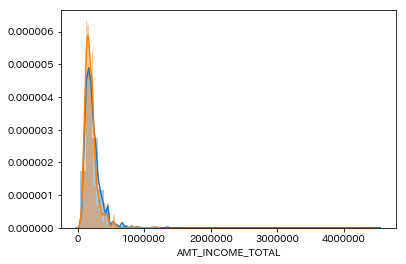

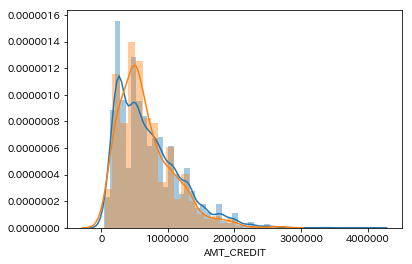

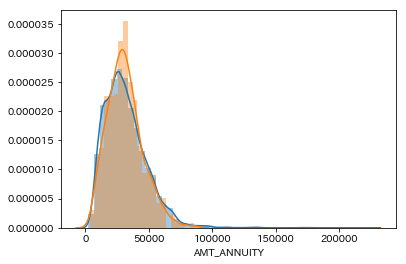

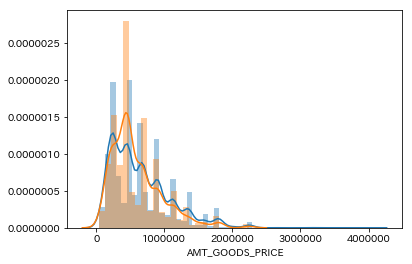

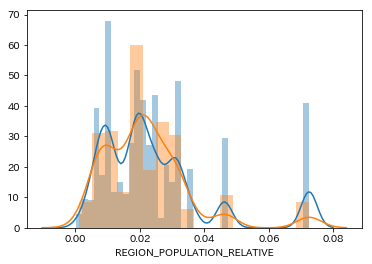

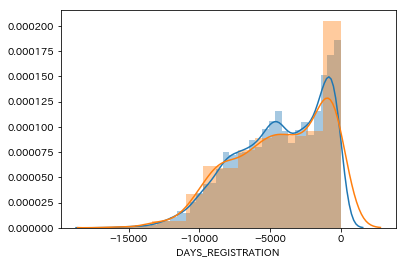

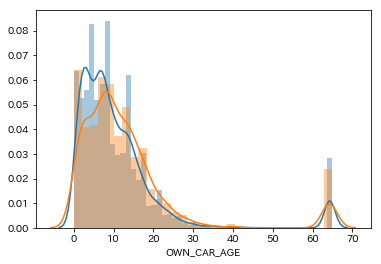

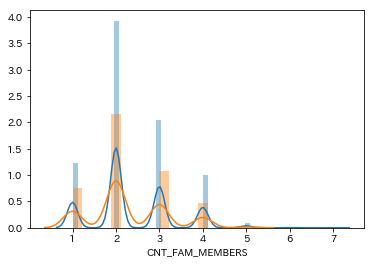

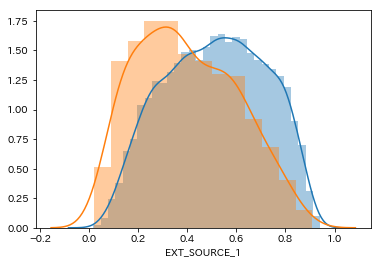

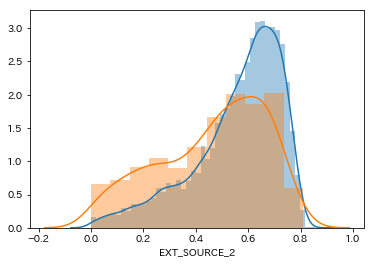

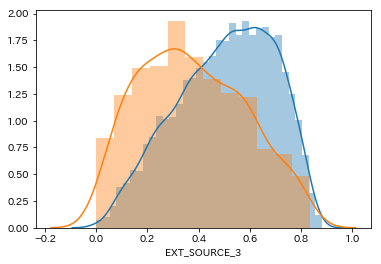

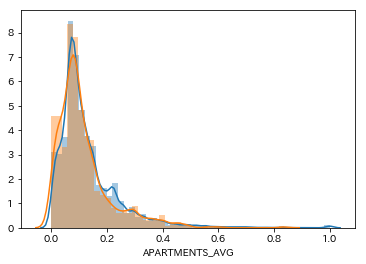

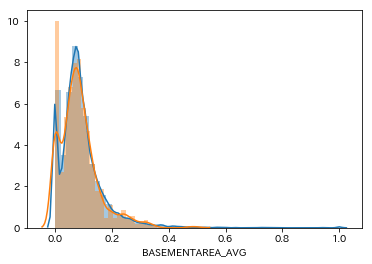

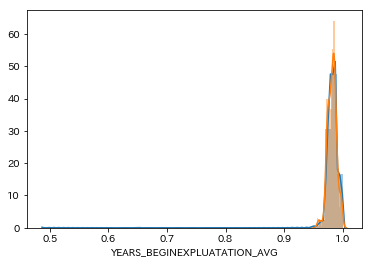

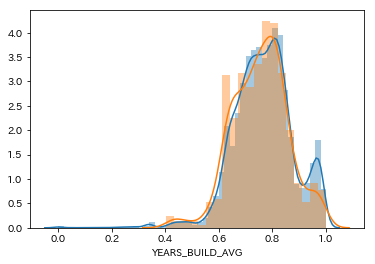

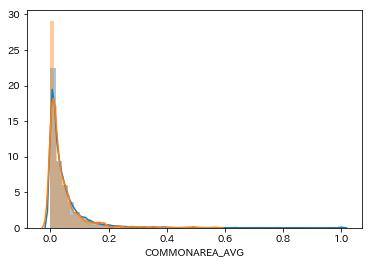

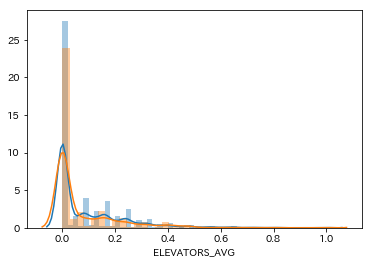

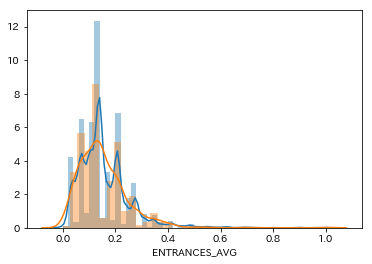

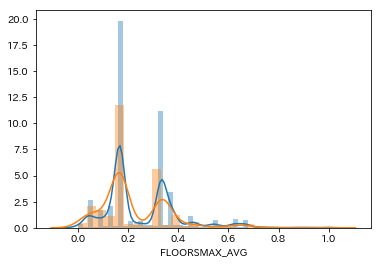

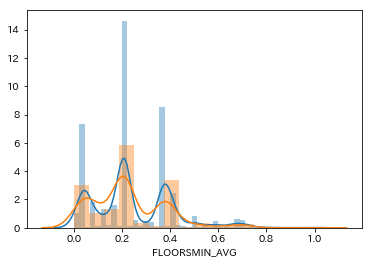

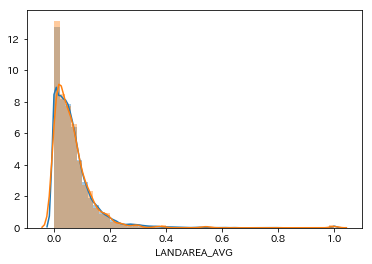

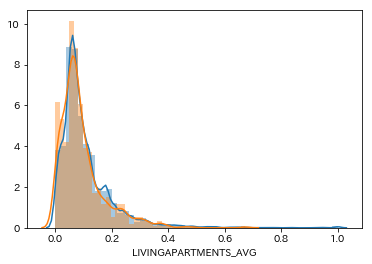

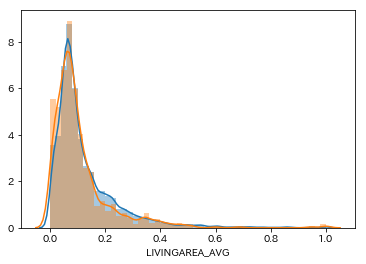

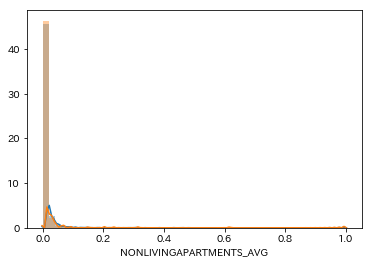

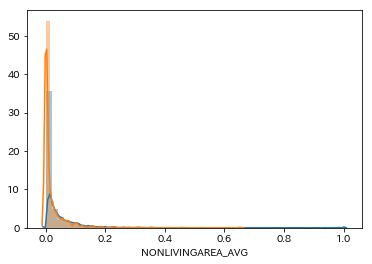

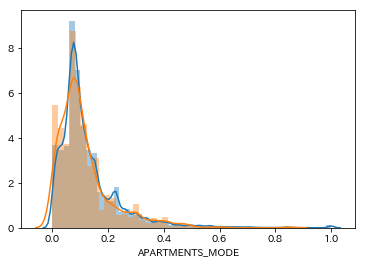

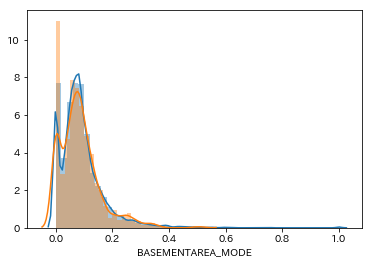

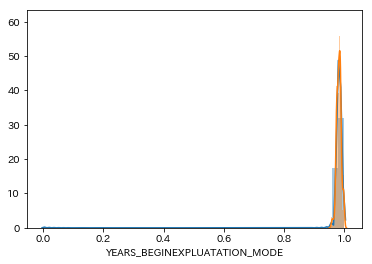

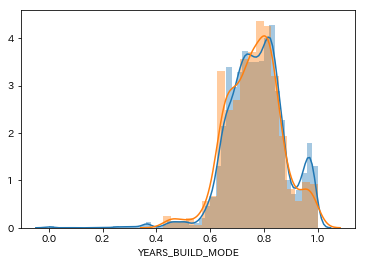

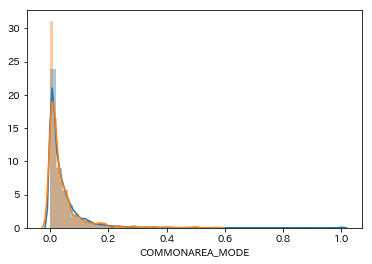

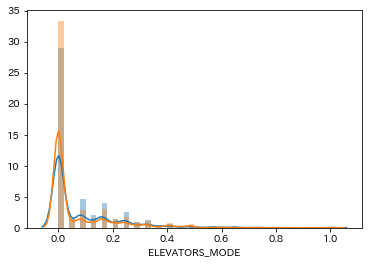

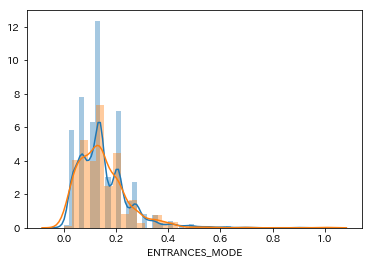

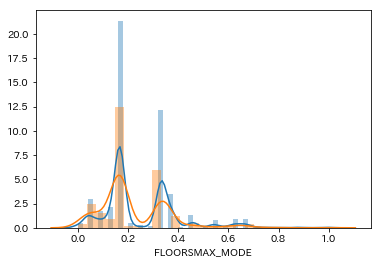

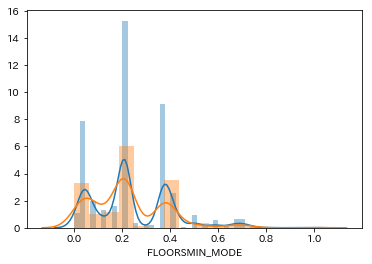

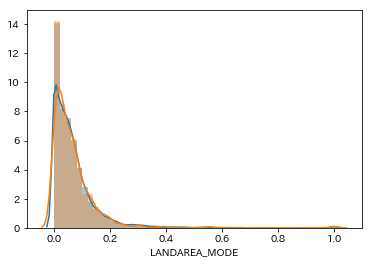

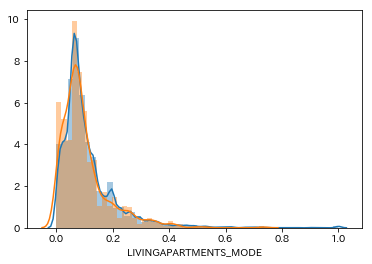

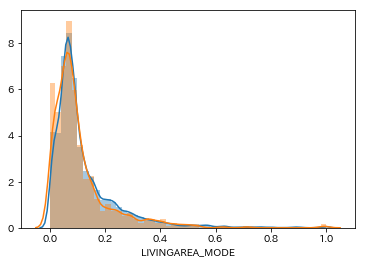

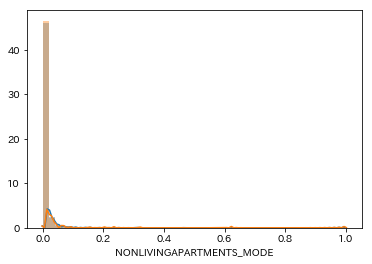

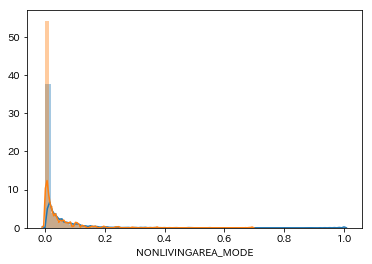

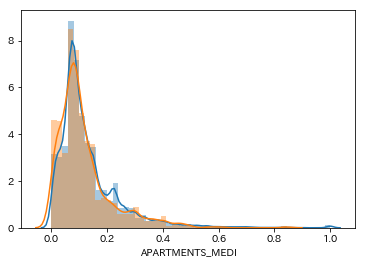

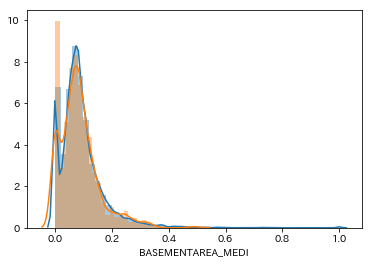

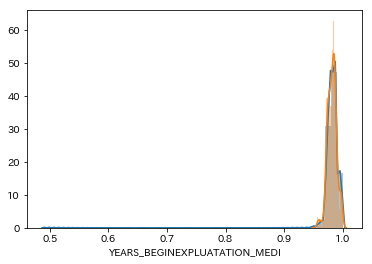

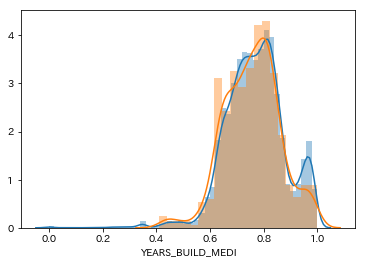

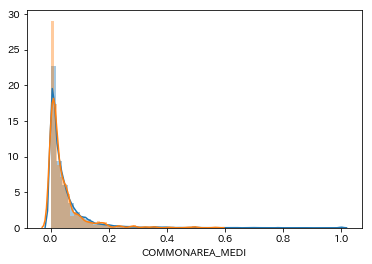

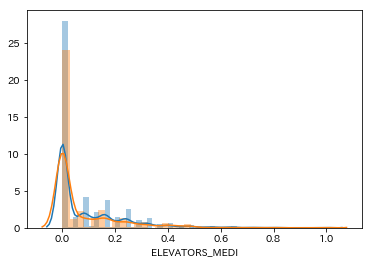

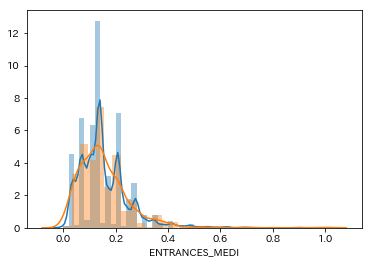

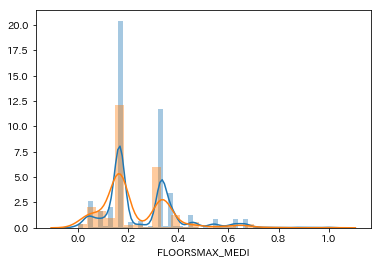

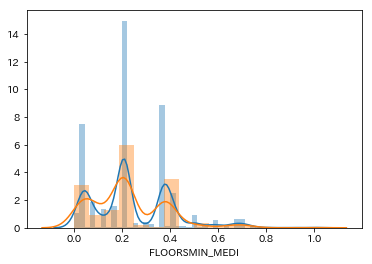

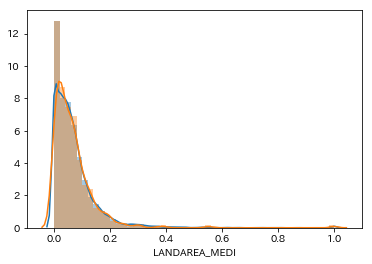

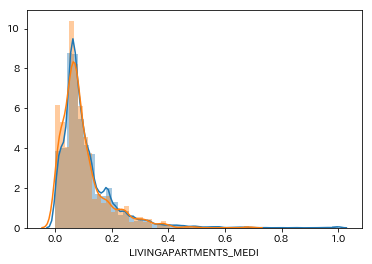

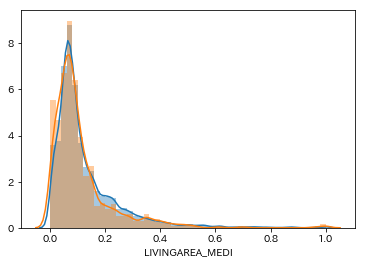

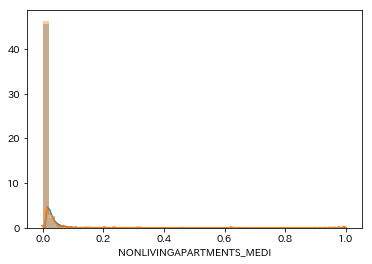

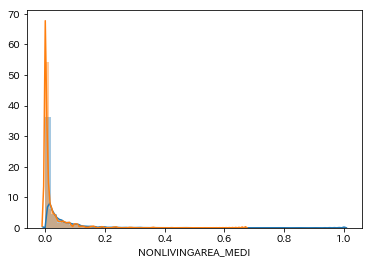

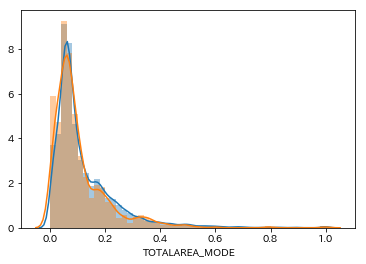

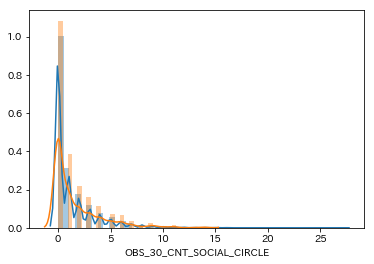

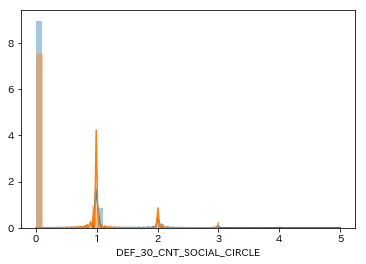

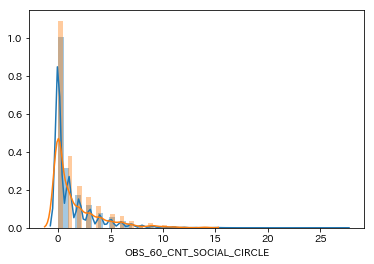

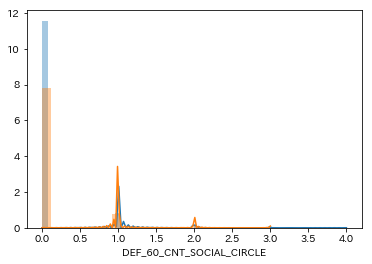

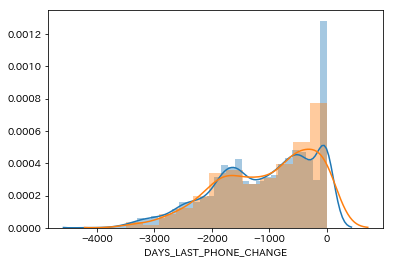

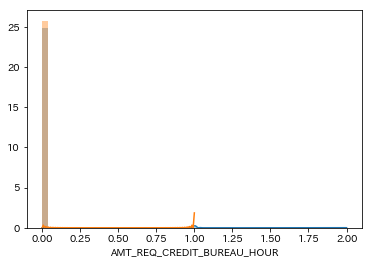

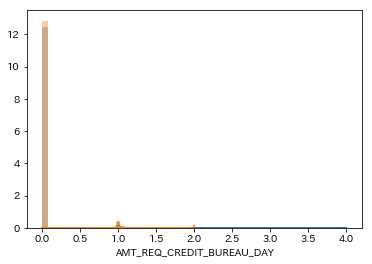

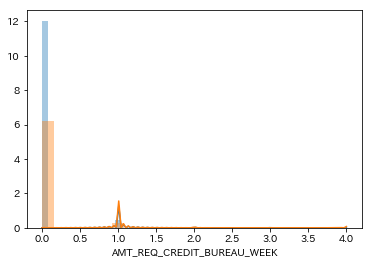

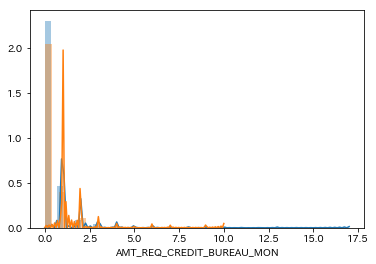

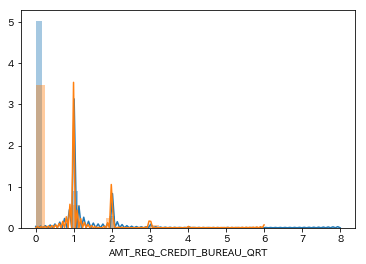

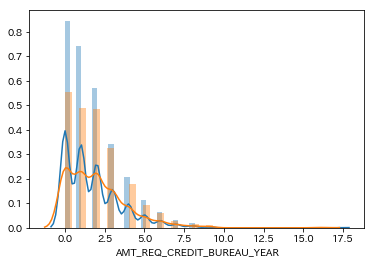

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


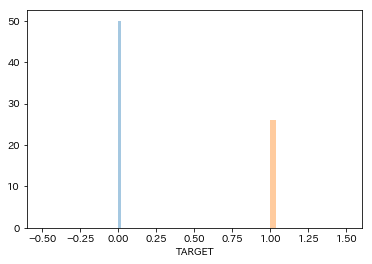

In [11]:
# ターゲット変数別にヒストグラムを出力
for i in range(len(df_fl.columns)):
    sns.distplot(df_fl0.dropna().iloc[:,i]) #欠損値は全て取り除く
    sns.distplot(df_fl1.dropna().iloc[:,i])
    plt.show()

ここまで
- いくつかの特徴量がターゲットによってかなり異なることがわかった。
- 特にEXT_SOURCE１，２，３がかなり違う。
- 特徴量によっては極端な分布がになっていて見づらいので、対数変換等してからじゃないと分かりづらいかもしれないものも合った。

## イント型を見ていく

In [12]:
# データインと型のみ
df_in = df[df.columns[df.dtypes == 'int64']]
df_in

SK_ID_CURR  TARGET  CNT_CHILDREN  DAYS_BIRTH  DAYS_EMPLOYED  \
0           100002       1             0       -9461           -637   
1           100003       0             0      -16765          -1188   
2           100004       0             0      -19046           -225   
3           100006       0             0      -19005          -3039   
4           100007       0             0      -19932          -3038   
5           100008       0             0      -16941          -1588   
6           100009       0             1      -13778          -3130   
7           100010       0             0      -18850           -449   
8           100011       0             0      -20099         365243   
9           100012       0             0      -14469          -2019   
10          100014       0             1      -10197           -679   
11          100015       0             0      -20417         365243   
12          100016       0             0      -13439          -2717   
13          100017       0             1      -14086          -3028   
14          100018       0             0      -14583           -203   
15          100019       0             0       -8728          -1157   
16          100020       0             0      -12931          -1317   
17          100021       0             1       -9776           -191   
18          100022       0             0      -17718          -7804   
19          100023       0             1      -11348          -2038   
20          100024       0             0      -18252          -4286   
21          100025       0             1      -14815          -1652   
22          100026       0             1      -11146          -4306   
23          100027       0             0      -24827         365243   
24          100029       0             2      -11286           -746   
25          100030       0             0      -19334          -3494   
26          100031       1             0      -18724          -2628   
27          100032       0             1      -15948          -1234   
28          100033       0             0       -9994          -1796   
29          100034       0             0      -10341          -1010   
...            ...     ...           ...         ...            ...   
307481      456225       1             0      -20644          -3147   
307482      456226       0             0      -14106           -226   
307483      456227       0             0      -24911         365243   
307484      456228       0             0      -12847           -328   
307485      456229       0             1      -11973           -670   
307486      456230       0             1      -16010          -1185   
307487      456231       0             0      -23125         365243   
307488      456232       0             0      -10092          -1218   
307489      456233       1             0      -16471           -286   
307490      456234       0             0       -9874          -1928   
307491      456235       0             2      -10976          -1953   
307492      456236       0             0      -20965          -1618   
307493      456237       0             0      -17533          -2306   
307494      456238       0             1      -14958          -6573   
307495      456239       0             0      -20922          -7438   
307496      456240       0             0      -17345          -2178   
307497      456241       0             0      -16679          -1222   
307498      456242       0             0      -19102          -3689   
307499      456243       0             0      -16988          -8694   
307500      456244       0             0      -20390          -5326   
307501      456245       0             3      -12961          -1046   
307502      456246       0             1      -16063          -8736   
307503      456247       0             0      -11870           -399   
307504      456248       0             0      -16705          -7258   
307505      456249       0      

In [13]:
# ターゲット変数０と１で分ける。
df_in0 = df_in[df_in.TARGET == 0]
df_in1 = df_in[df_in.TARGET == 1]

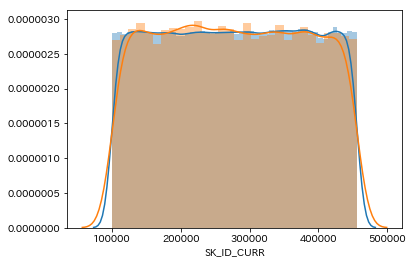

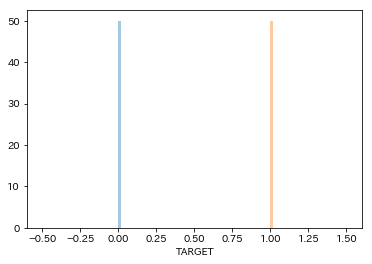

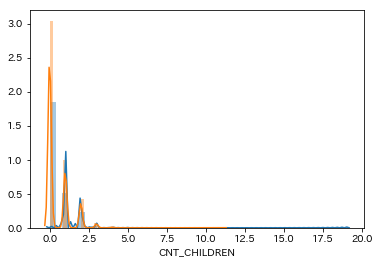

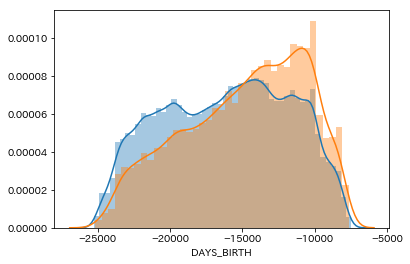

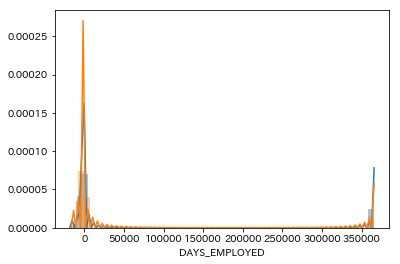

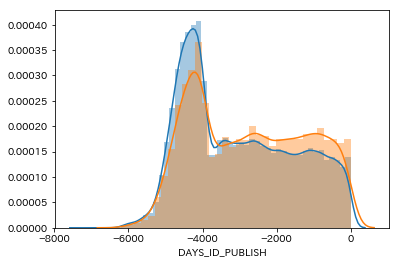

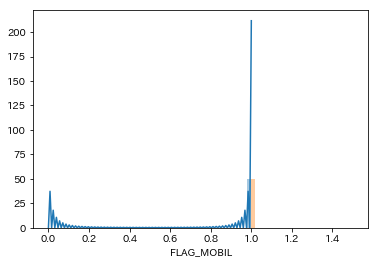

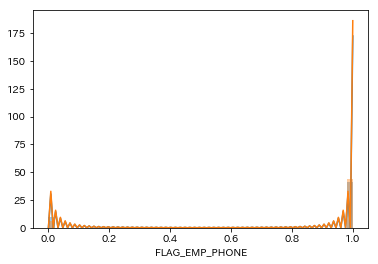

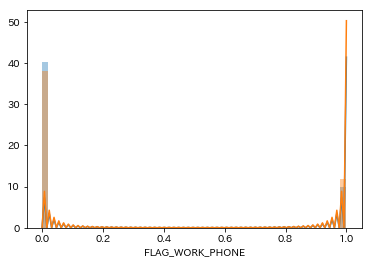

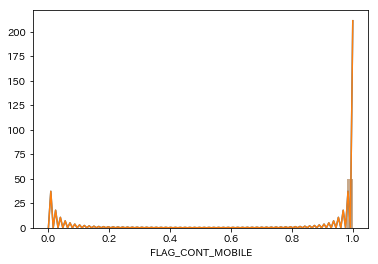

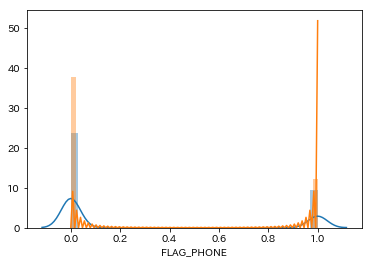

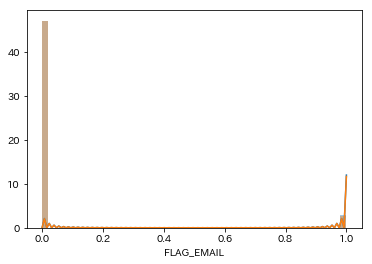

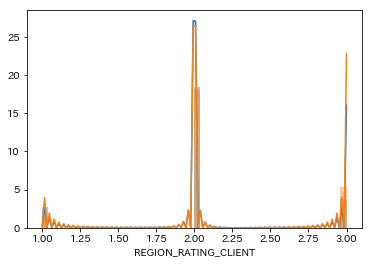

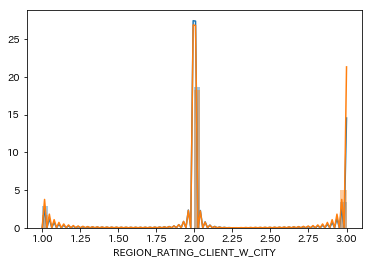

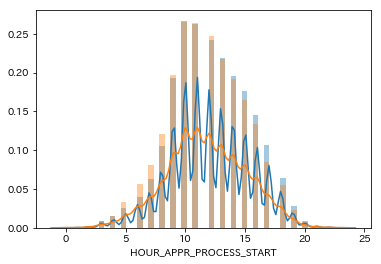

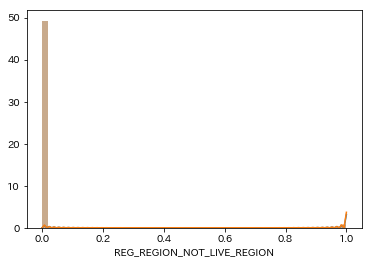

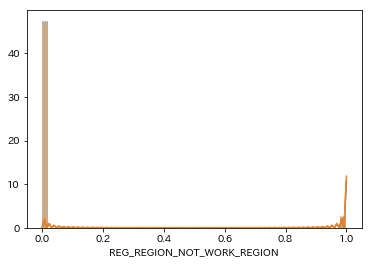

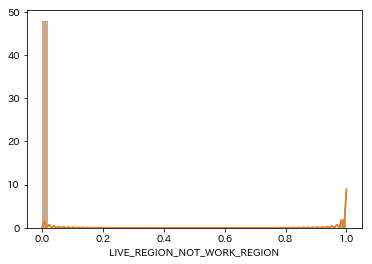

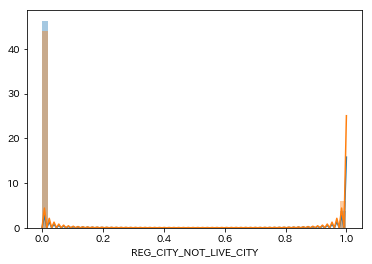

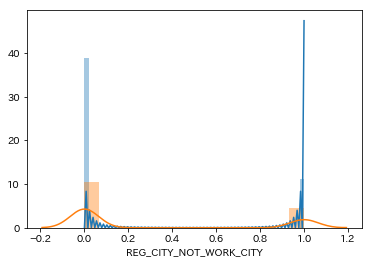

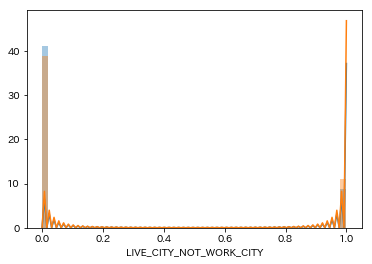

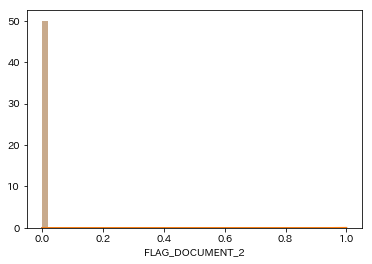

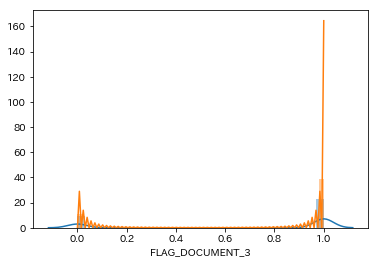

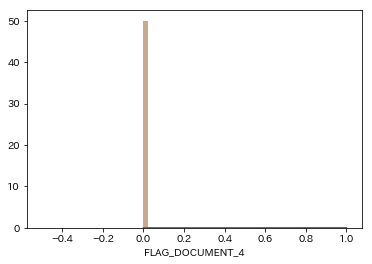

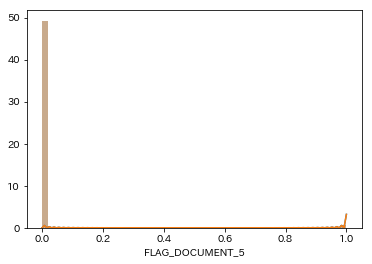

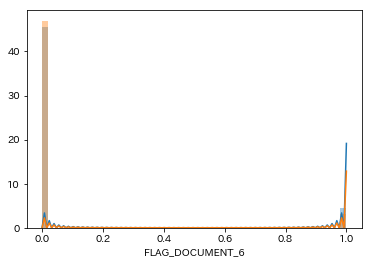

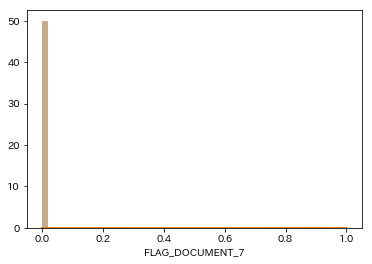

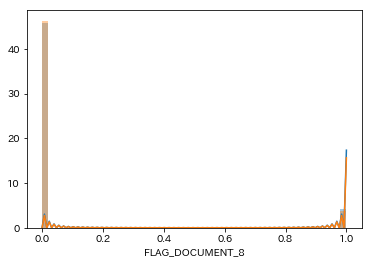

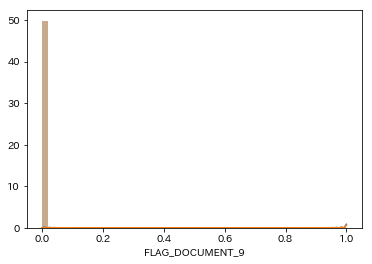

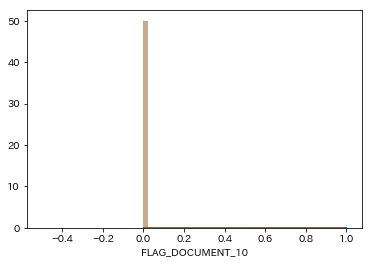

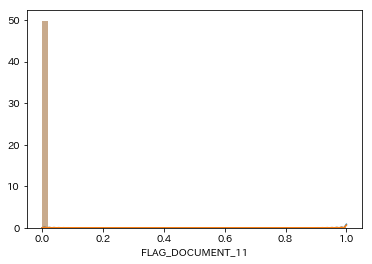

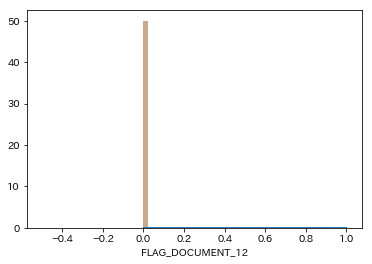

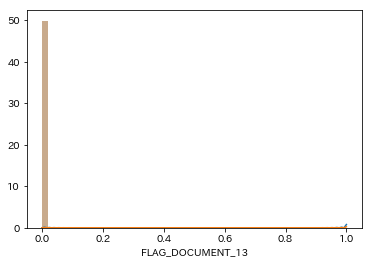

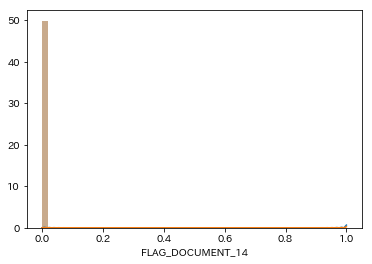

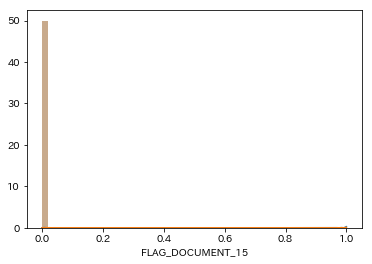

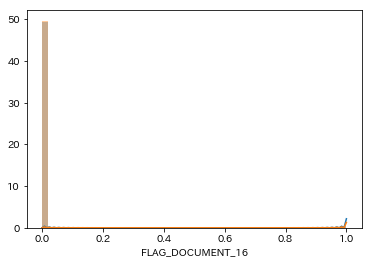

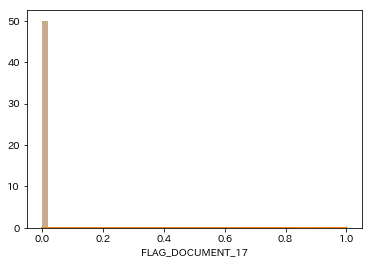

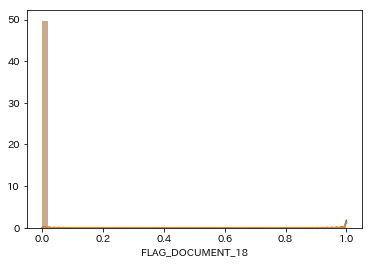

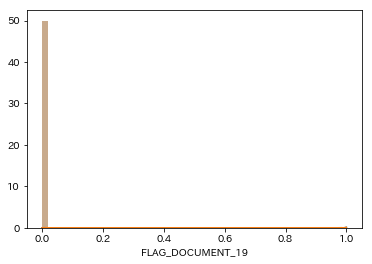

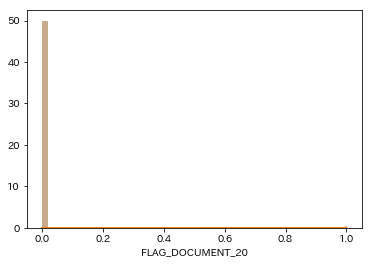

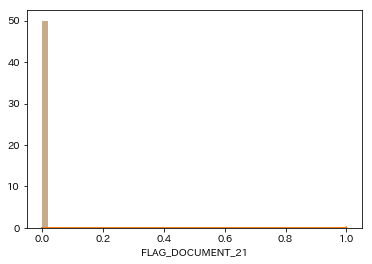

In [14]:
# ターゲット変数別にヒストグラムを出力
for i in range(len(df_in.columns)):
    sns.distplot(df_in0.dropna().iloc[:,i]) #欠損値は全て取り除く
    sns.distplot(df_in1.dropna().iloc[:,i])
    plt.show()

## オブジェクト型について見ていく

In [15]:
# データオブジェクト型のみ
df_ob = df[df.columns[df.dtypes == 'object']]
df_ob = pd.concat([df_ob,df.TARGET],axis=1)
df_ob

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
5              Cash loans           M            N               Y   
6              Cash loans           F            Y               Y   
7              Cash loans           M            Y               Y   
8              Cash loans           F            N               Y   
9         Revolving loans           M            N               Y   
10             Cash loans           F            N               Y   
11             Cash loans           F            N               Y   
12             Cash loans           F            N               Y   
13             Cash loans           M            Y               N   
14             Cash loans           F            N               Y   
15             Cash loans           M            Y               Y   
16             Cash loans           M            N               N   
17        Revolving loans           F            N               Y   
18        Revolving loans           F            N               Y   
19             Cash loans           F            N               Y   
20        Revolving loans           M            Y               Y   
21             Cash loans           F            Y               Y   
22             Cash loans           F            N               N   
23             Cash loans           F            N               Y   
24             Cash loans           M            Y               N   
25             Cash loans           F            N               Y   
26             Cash loans           F            N               Y   
27             Cash loans           M            N               Y   
28             Cash loans           M            Y               Y   
29        Revolving loans           M            N               Y   
...                   ...         ...          ...             ...   
307481         Cash loans           M            N               Y   
307482         Cash loans           F            Y               Y   
307483         Cash loans           F            N               Y   
307484         Cash loans           F            Y               N   
307485    Revolving loans           F            N               Y   
307486         Cash loans           F            Y               Y   
307487         Cash loans           M            N               Y   
307488         Cash loans           F            N               N   
307489         Cash loans           F            N               Y   
307490         Cash loans           M            N               Y   
307491         Cash loans           M            Y               Y   
307492         Cash loans           M            Y               Y   
307493         Cash loans           F            N               Y   
307494         Cash loans           M            Y               N   
307495         Cash loans           M            Y               N   
307496    Revolving loans           F            N               N   
307497         Cash loans           F            Y               Y   
307498         Cash loans           M            Y               Y   
307499         Cash loans           F            N               Y   
307500         Cash loans           F            N               Y   
307501         Cash loans           F            N               Y   
307502         Cash loans           F            N               Y   
307503         Cash loans           F            N               Y   
307504         Cash loans           F            N               Y   
307505         Cash loans           F            N               Y   
307506         Ca

In [16]:
# 同様にターゲット変数毎に分ける
df_ob0 = df_ob[df_ob.TARGET == 0]
df_ob1 = df_ob[df_ob.TARGET == 1]

デフォルト0の人は282686人,１の人は24825人


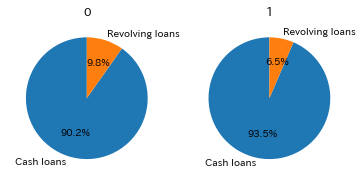

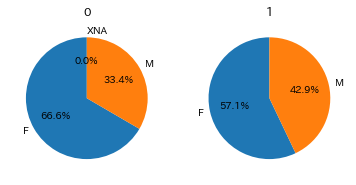

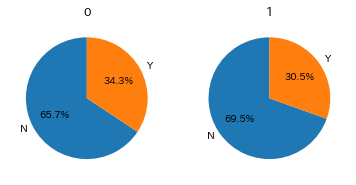

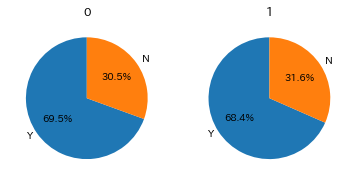

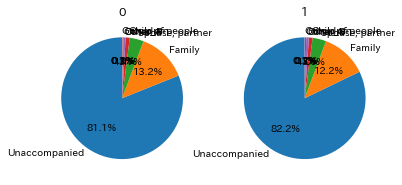

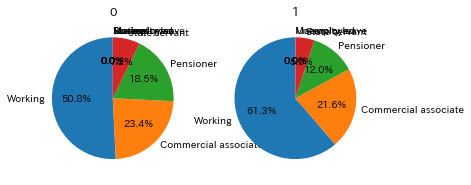

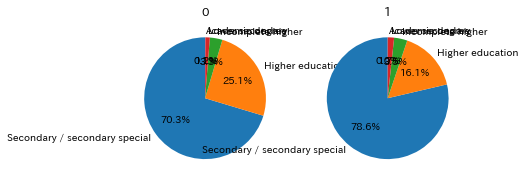

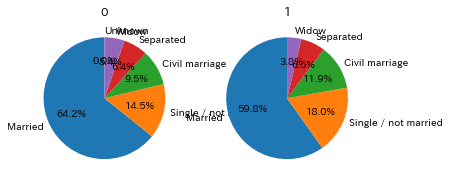

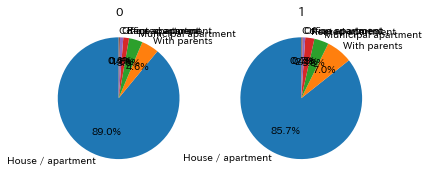

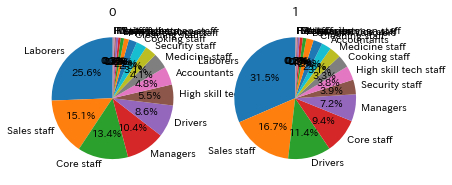

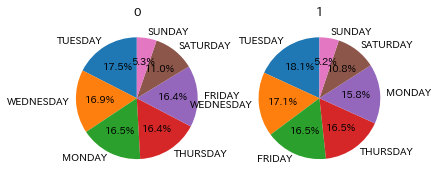

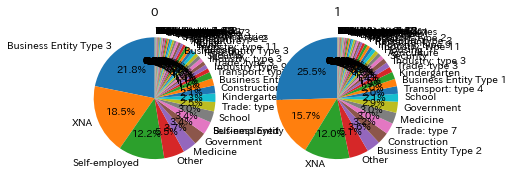

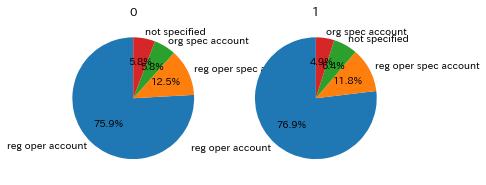

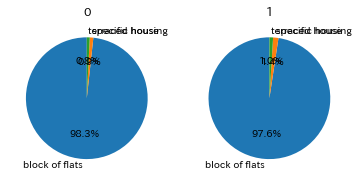

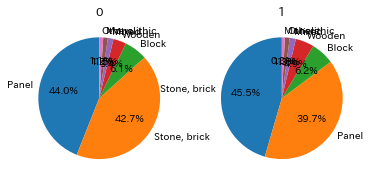

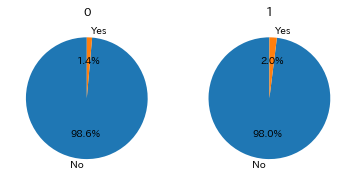

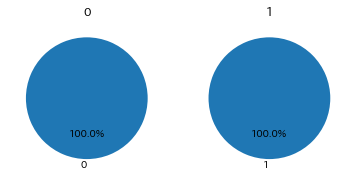

In [17]:
# 円グラフで可視化
print('デフォルト0の人は{}人,１の人は{}人'.format(len(df_ob0),len(df_ob1)))

for i in range(len(df_ob.columns)):
    x = df_ob0.iloc[:,i].value_counts() # ターゲットの０の人のカテゴリごとの人数をxへ代入
    y = df_ob1.iloc[:,i].value_counts() # yも同じく
    
    fig,ax = plt.subplots(1,2) # 並べて表示するために
    
    ax[0].pie(x,autopct="%1.1f%%",labels=x.index,startangle=90) # ax[0]にターゲット０の人の円グラフを表示
    ax[0].set_title('0')
    ax[1].pie(y,autopct="%1.1f%%",labels=y.index,startangle=90)
    ax[1].set_title('1')
    plt.show()

ここまで

- いくつか0と1で割合が異なる特徴量が合った。
- それぞれ総数がわからないので総数の確認も必要かも

## そもそも量が多いので数を絞って見ていく

In [18]:
# １万人にランダムサンプリングした。
df_sa = df.sample(n=10000)
df_sa

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
109070      226497       0         Cash loans           M            Y   
26662       130991       0         Cash loans           M            Y   
306031      454572       0         Cash loans           F            N   
15358       117927       0         Cash loans           F            Y   
140809      263265       1         Cash loans           F            N   
137189      259109       0         Cash loans           F            Y   
49961       157832       0    Revolving loans           F            Y   
76350       188533       0         Cash loans           F            N   
273075      416551       1         Cash loans           F            Y   
127920      248362       0         Cash loans           F            N   
78282       190754       0         Cash loans           M            N   
248027      386993       1         Cash loans           M            N   
129148      249803       0         Cash loans           F            N   
79222       191835       1         Cash loans           F            N   
269601      412441       0         Cash loans           F            N   
61501       171326       0         Cash loans           F            N   
99084       215042       0         Cash loans           F            N   
161044      286688       0         Cash loans           F            N   
34469       139941       0         Cash loans           F            N   
220978      355988       1         Cash loans           F            N   
76389       188581       0         Cash loans           F            N   
104974      221813       0         Cash loans           M            N   
62860       172911       0         Cash loans           F            Y   
162584      288482       0         Cash loans           F            N   
256944      397341       0         Cash loans           F            N   
184187      313489       0    Revolving loans           F            N   
92660       207593       0         Cash loans           M            Y   
41011       147494       0         Cash loans           F            N   
269599      412439       0         Cash loans           F            N   
291497      437701       0         Cash loans           M            Y   
...            ...     ...                ...         ...          ...   
124305      244150       0         Cash loans           F            N   
237175      374712       0         Cash loans           M            Y   
208510      341678       0         Cash loans           F            N   
257563      398053       1         Cash loans           M            N   
172814      300261       0         Cash loans           F            N   
145333      268526       0         Cash loans           M            N   
288873      434661       0         Cash loans           M            Y   
6906        108048       0         Cash loans           M            Y   
139244      261454       1         Cash loans           F            Y   
171209      298419       0    Revolving loans           F            N   
502         100579       0         Cash loans           M            N   
207031      339969       0         Cash loans           F            N   
113308      231410       0         Cash loans           M            N   
122322      241824       1         Cash loans           F            N   
10612       112366       0    Revolving loans           F            N   
248397      387401       0         Cash loans           F            N   
183365      312533       1         Cash loans           M            Y   
111262      229088       0         Cash loans           F            N   
206856      339762       0         Cash loans           F            N   
65757       176249       1         Cash loans           F            N   
228397      364555       0         Cash loans           F            N   
210947      344464       0         Cash loans           F            N   
92521       

In [19]:
# データ型のオブジェクト以外
df_sa_in_fl = df_sa[df_sa.columns[df_sa.dtypes != 'object']]
df_sa_in_fl = df_sa_in_fl.drop('SK_ID_CURR',axis=1)
df_sa_in_fl

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
109070       0             0         90000.000  314100.000    17037.000   
26662        0             1        292500.000 1777500.000    47020.500   
306031       0             1         85500.000  640080.000    29970.000   
15358        0             1        877500.000 1381113.000    36562.500   
140809       1             0        180000.000  384048.000    18031.500   
137189       0             0        202500.000  701730.000    68359.500   
49961        0             2        157500.000  270000.000    13500.000   
76350        0             0         99000.000  123993.000     6093.000   
273075       1             0        360000.000 1078200.000    31653.000   
127920       0             0        180000.000 1102828.500    32373.000   
78282        0             0        135000.000  497520.000    39307.500   
248027       1             0        225000.000  808650.000    26086.500   
129148       0             0        135000.000  143910.000    14148.000   
79222        1             1         99000.000  263686.500    27819.000   
269601       0             0        112500.000  719946.000    28683.000   
61501        0             0         54000.000  585000.000    17235.000   
99084        0             0        135000.000  180000.000    14350.500   
161044       0             0         67500.000  225000.000    17797.500   
34469        0             0        135000.000  728460.000    38938.500   
220978       1             1         74250.000  211500.000    14436.000   
76389        0             0        108000.000  765000.000    20308.500   
104974       0             1        180000.000 1350000.000    44617.500   
62860        0             3        157500.000  284400.000    20740.500   
162584       0             0        112500.000 1057657.500    54130.500   
256944       0             0        292500.000 1308964.500    36126.000   
184187       0             0        112500.000  337500.000    16875.000   
92660        0             0        166500.000 1345500.000    39469.500   
41011        0             0        315000.000  648598.500    23427.000   
269599       0             0        135000.000  320382.000    15543.000   
291497       0             0        112500.000  225000.000    22612.500   
...        ...           ...               ...         ...          ...   
124305       0             0        225000.000  792477.000    23301.000   
237175       0             2        135000.000  508495.500    24592.500   
208510       0             0        112500.000  544068.000    26590.500   
257563       1             1        202500.000  168102.000    11362.500   
172814       0             0        202500.000  794173.500    38335.500   
145333       0             0        292500.000  254700.000    25321.500   
288873       0             2        153000.000 1288350.000    37800.000   
6906         0             0        180000.000 1303812.000    38250.000   
139244       1             0         90000.000  254700.000    27558.000   
171209       0             0        157500.000  270000.000    13500.000   
502          0             2        180000.000  270000.000    29209.500   
207031       0             0        382500.000  675000.000    36616.500   
113308       0             0        157500.000  247275.000    19548.000   
122322       1             0        112500.000 1312110.000    52168.500   
10612        0             0         67500.000  180000.000     9000.000   
248397       0             0         81000.000  301500.000    18216.000   
183365       1             0        270000.000  490495.500    31504.500   
111262       0             1        135000.000 1185282.000    34785.000   
206856       0             0        112500.000  484789.500    21483.000   
65757        1             0        171000.000  776304.000    25173.000   
228397       0             0        135000.000  900000.000    26316.000   
210947       0             0     

In [20]:
#　概要を確認
df_sa_in_fl.describe()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
count 10000.000     10000.000         10000.000   10000.000    10000.000   
mean      0.085         0.418        168054.071  605419.676    27146.712   
std       0.278         0.733        101957.266  401178.249    14452.495   
min       0.000         0.000         29250.000   45000.000     1980.000   
25%       0.000         0.000        112500.000  273636.000    16668.000   
50%       0.000         0.000        148500.000  521280.000    24970.500   
75%       0.000         1.000        202500.000  808650.000    34587.000   
max       1.000         6.000       4500000.000 2517300.000   225000.000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
count         9991.000                   10000.000   10000.000      10000.000   
mean        543779.460                       0.021  -16055.252      63369.840   
std         368150.841                       0.014    4359.249     140882.017   
min          45000.000                       0.001  -25191.000     -16061.000   
25%         247500.000                       0.010  -19710.250      -2686.000   
50%         450000.000                       0.019  -15807.000      -1181.500   
75%         679500.000                       0.029  -12394.750       -273.000   
max        2250000.000                       0.073   -7697.000     365243.000   

       DAYS_REGISTRATION             ...              FLAG_DOCUMENT_18  \
count          10000.000             ...                     10000.000   
mean           -4979.109             ...                         0.007   
std             3510.615             ...                         0.083   
min           -21244.000             ...                         0.000   
25%            -7509.000             ...                         0.000   
50%            -4496.000             ...                         0.000   
75%            -1995.000             ...                         0.000   
max                0.000             ...                         1.000   

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count         10000.000         10000.000         10000.000   
mean              0.001             0.000             0.000   
std               0.022             0.020             0.020   
min               0.000             0.000             0.000   
25%               0.000             0.000             0.000   
50%               0.000             0.000             0.000   
75%               0.000             0.000             0.000   
max               1.000             1.000             1.000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count                    8622.000                   8622.000   
mean                        0.006                      0.007   
std                         0.077                      0.091   
min                         0.000                      0.000   
25%                         0.000                      0.000   
50%                         0.000                      0.000   
75%                         0.000                      0.000   
max                         2.000                      3.000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count                    8622.000                   8622.000   
mean                        0.037                      0.282   
std                         0.225                      0.939   
min                         0.000                      0.000   
25%                         0.000                      0.000   
50%                         0.000                      0.000   
75%                         0.000                      0.000   
max                         8.000                     17.000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count                   8622.000                    8622.000  
mean                       0.266                       1.893  
std             

# 【問題3】課題設定

- EXT_SOURCE_１，２，３がとても重要そう。

- だが、欠損値が多いのでどう埋めるかが重要そう。

- EXT_SOURCE_１，２，３とそのた関数の関係性を見出す事ができれば

- EXT_SOURCE_１，２，３を埋めることができて精度を上げることが出来るかも

# 【問題4】データ探索

## EXT_SOURCE_１，２，３を目的変数として、ライトブーストを行って、重要そうな変数を調べてみる。

In [21]:
# テスト１の欠損値の割合
test_null_p = pd.DataFrame((testdf.isnull().sum() /len(testdf)).sort_values(ascending=False))
test_null_p.head(50)

0
COMMONAREA_MEDI              0.687
COMMONAREA_AVG               0.687
COMMONAREA_MODE              0.687
NONLIVINGAPARTMENTS_MODE     0.684
NONLIVINGAPARTMENTS_MEDI     0.684
NONLIVINGAPARTMENTS_AVG      0.684
FONDKAPREMONT_MODE           0.673
LIVINGAPARTMENTS_AVG         0.672
LIVINGAPARTMENTS_MEDI        0.672
LIVINGAPARTMENTS_MODE        0.672
FLOORSMIN_MEDI               0.666
FLOORSMIN_MODE               0.666
FLOORSMIN_AVG                0.666
OWN_CAR_AGE                  0.663
YEARS_BUILD_MEDI             0.653
YEARS_BUILD_MODE             0.653
YEARS_BUILD_AVG              0.653
LANDAREA_AVG                 0.580
LANDAREA_MODE                0.580
LANDAREA_MEDI                0.580
BASEMENTAREA_AVG             0.567
BASEMENTAREA_MODE            0.567
BASEMENTAREA_MEDI            0.567
NONLIVINGAREA_MODE           0.535
NONLIVINGAREA_AVG            0.535
NONLIVINGAREA_MEDI           0.535
ELEVATORS_AVG                0.517
ELEVATORS_MEDI               0.517
ELEVATORS_MODE               0.517
WALLSMATERIAL_MODE           0.490
APARTMENTS_AVG               0.490
APARTMENTS_MEDI              0.490
APARTMENTS_MODE              0.490
HOUSETYPE_MODE               0.485
ENTRANCES_MEDI               0.484
ENTRANCES_AVG                0.484
ENTRANCES_MODE               0.484
LIVINGAREA_MEDI              0.483
LIVINGAREA_MODE              0.483
LIVINGAREA_AVG               0.483
FLOORSMAX_MODE               0.478
FLOORSMAX_MEDI               0.478
FLOORSMAX_AVG                0.478
YEARS_BEGINEXPLUATATION_AVG  0.469
YEARS_BEGINEXPLUATATION_MEDI 0.469
YEARS_BEGINEXPLUATATION_MODE 0.469
TOTALAREA_MODE               0.464
EMERGENCYSTATE_MODE          0.456
EXT_SOURCE_1                 0.421
OCCUPATION_TYPE              0.320

EXT_SOURCE_1は４割nanなのでこれを正確に埋めたい。

In [22]:
# 適当に全てダミー変数化して、ｘとyにデータを分けた
df_d = pd.get_dummies(df,drop_first=True)
x = df_d.dropna().drop(['SK_ID_CURR','TARGET','EXT_SOURCE_1'],axis=1)
y = df_d.dropna()['EXT_SOURCE_1']

In [23]:
#lgbをインポート
import lightgbm as lgb
model = lgb.LGBMRegressor(random_state = 0) #パラメータは適当

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [24]:
# model.fit(X=x,y=y)

ノートブックが死んだからやり直し

In [25]:
#'EXT_SOURCE_1がnanの行は全て削除
EX_notn = df.dropna(subset=['EXT_SOURCE_1'])

EX_notn = EX_notn.dropna(axis=1) #他の列でnanがある列は全て削除
EX_notn

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
6           100009       0         Cash loans           F            Y   
8           100011       0         Cash loans           F            N   
10          100014       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
12          100016       0         Cash loans           F            N   
14          100018       0         Cash loans           F            N   
15          100019       0         Cash loans           M            Y   
20          100024       0    Revolving loans           M            Y   
21          100025       0         Cash loans           F            Y   
25          100030       0         Cash loans           F            N   
28          100033       0         Cash loans           M            Y   
29          100034       0    Revolving loans           M            N   
31          100036       0         Cash loans           F            N   
36          100043       0         Cash loans           F            N   
37          100044       0         Cash loans           M            N   
42          100049       1         Cash loans           F            N   
48          100055       0         Cash loans           F            N   
50          100058       0    Revolving loans           F            N   
51          100059       0         Cash loans           M            Y   
52          100060       0         Cash loans           M            Y   
53          100061       0         Cash loans           F            N   
55          100063       0         Cash loans           F            N   
57          100068       0    Revolving loans           M            N   
63          100075       0         Cash loans           F            N   
65          100077       0         Cash loans           M            N   
66          100078       0         Cash loans           F            Y   
67          100079       0    Revolving loans           M            N   
68          100080       0    Revolving loans           F            N   
...            ...     ...                ...         ...          ...   
307456      456195       0         Cash loans           F            Y   
307458      456197       0         Cash loans           F            N   
307459      456198       0         Cash loans           M            Y   
307460      456199       0         Cash loans           M            Y   
307461      456200       0         Cash loans           F            N   
307464      456204       0         Cash loans           F            N   
307467      456207       0    Revolving loans           F            N   
307468      456208       0         Cash loans           F            N   
307471      456211       0         Cash loans           F            N   
307472      456212       0         Cash loans           F            N   
307473      456213       0         Cash loans           F            Y   
307474      456214       0         Cash loans           M            Y   
307475      456215       1         Cash loans           F            N   
307476      456216       0         Cash loans           F            N   
307478      456218       0         Cash loans           F            N   
307479      456219       0         Cash loans           F            N   
307482      456226       0         Cash loans           F            Y   
307485      456229       0    Revolving loans           F            N   
307488      456232       0         Cash loans           F            N   
307490      456234       0         Cash loans           M            N   
307491      456235       0         Cash loans           M            Y   
307494      456238       0         Cash loans           M            Y   
307496      

In [26]:
# ワンホットではなく普通にカテゴリを数値に変換するだけなので列が増えないやつ、メモリに優しい
import category_encoders as ce
ce_ohe = ce.OrdinalEncoder()
EX_notn =ce_ohe.fit_transform(EX_notn)
EX_notn

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   1            1             1   
1           100003       0                   1            2             1   
6           100009       0                   1            2             2   
8           100011       0                   1            2             1   
10          100014       0                   1            2             1   
11          100015       0                   1            2             1   
12          100016       0                   1            2             1   
14          100018       0                   1            2             1   
15          100019       0                   1            1             2   
20          100024       0                   2            1             2   
21          100025       0                   1            2             2   
25          100030       0                   1            2             1   
28          100033       0                   1            1             2   
29          100034       0                   2            1             1   
31          100036       0                   1            2             1   
36          100043       0                   1            2             1   
37          100044       0                   1            1             1   
42          100049       1                   1            2             1   
48          100055       0                   1            2             1   
50          100058       0                   2            2             1   
51          100059       0                   1            1             2   
52          100060       0                   1            1             2   
53          100061       0                   1            2             1   
55          100063       0                   1            2             1   
57          100068       0                   2            1             1   
63          100075       0                   1            2             1   
65          100077       0                   1            1             1   
66          100078       0                   1            2             2   
67          100079       0                   2            1             1   
68          100080       0                   2            2             1   
...            ...     ...                 ...          ...           ...   
307456      456195       0                   1            2             2   
307458      456197       0                   1            2             1   
307459      456198       0                   1            1             2   
307460      456199       0                   1            1             2   
307461      456200       0                   1            2             1   
307464      456204       0                   1            2             1   
307467      456207       0                   2            2             1   
307468      456208       0                   1            2             1   
307471      456211       0                   1            2             1   
307472      456212       0                   1            2             1   
307473      456213       0                   1            2             2   
307474      456214       0                   1            1             2   
307475      456215       1                   1            2             1   
307476      456216       0                   1            2             1   
307478      456218       0                   1            2             1   
307479      456219       0                   1            2             1   
307482      456226       0                   1            2             2   
307485      456229       0                   2            2             1   
307488      456232       0                   1            2             1   
307490      456234       0                   1            1             1   
3074

In [27]:
# ｘとyにデータを分けた。目的変数はEXT
x = EX_notn.drop(['SK_ID_CURR','TARGET','EXT_SOURCE_1'],axis=1)
y = EX_notn['EXT_SOURCE_1']

In [28]:
# 何故かライトブーストはできなかったからランダムフォレストで確認
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(random_state=0,n_jobs=-1)
model = randomforest.fit(x,y)
importances = model.feature_importances_

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

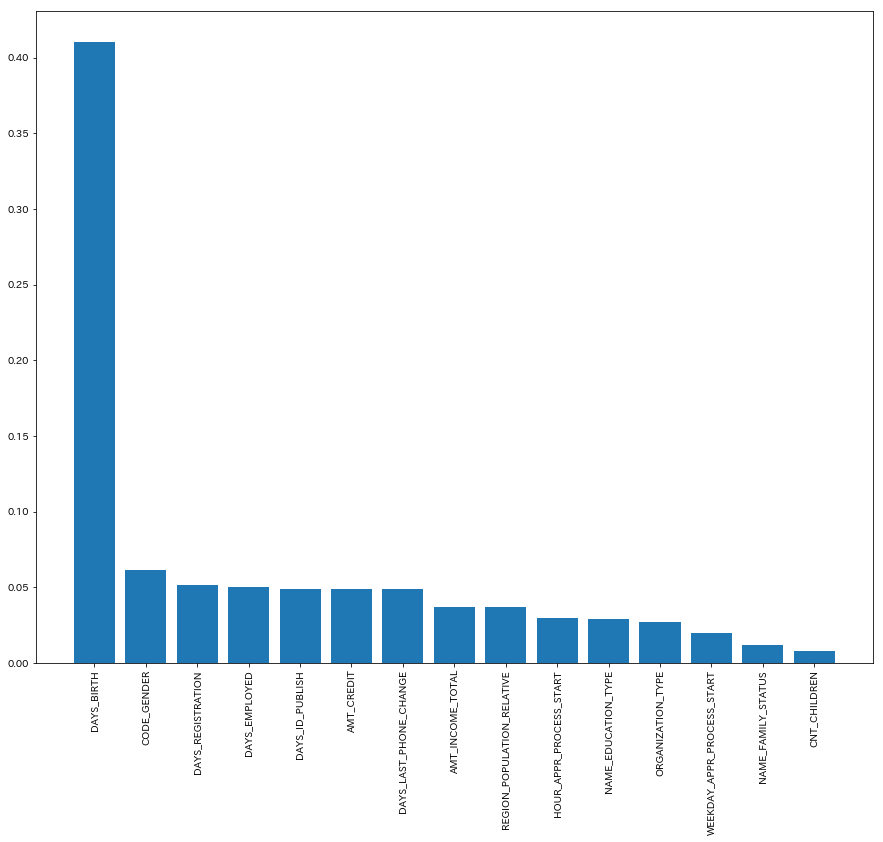

In [29]:
#可視化トップ１５を
indices = np.argsort(importances)[::-1]

names = [x.columns[i] for i in indices[:15]]

plt.figure(figsize=(15,12))
plt.bar(range(15),importances[indices[:15]])
plt.xticks(range(15),names,rotation=90)
plt.show

EXTに重要なのは誕生日が関係してそう。

この上位１５の変数の関係を見ていく

In [30]:
names.append('EXT_SOURCE_1')
names

['DAYS_BIRTH',
 'CODE_GENDER',
 'DAYS_REGISTRATION',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'AMT_CREDIT',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'HOUR_APPR_PROCESS_START',
 'NAME_EDUCATION_TYPE',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_FAMILY_STATUS',
 'CNT_CHILDREN',
 'EXT_SOURCE_1']

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


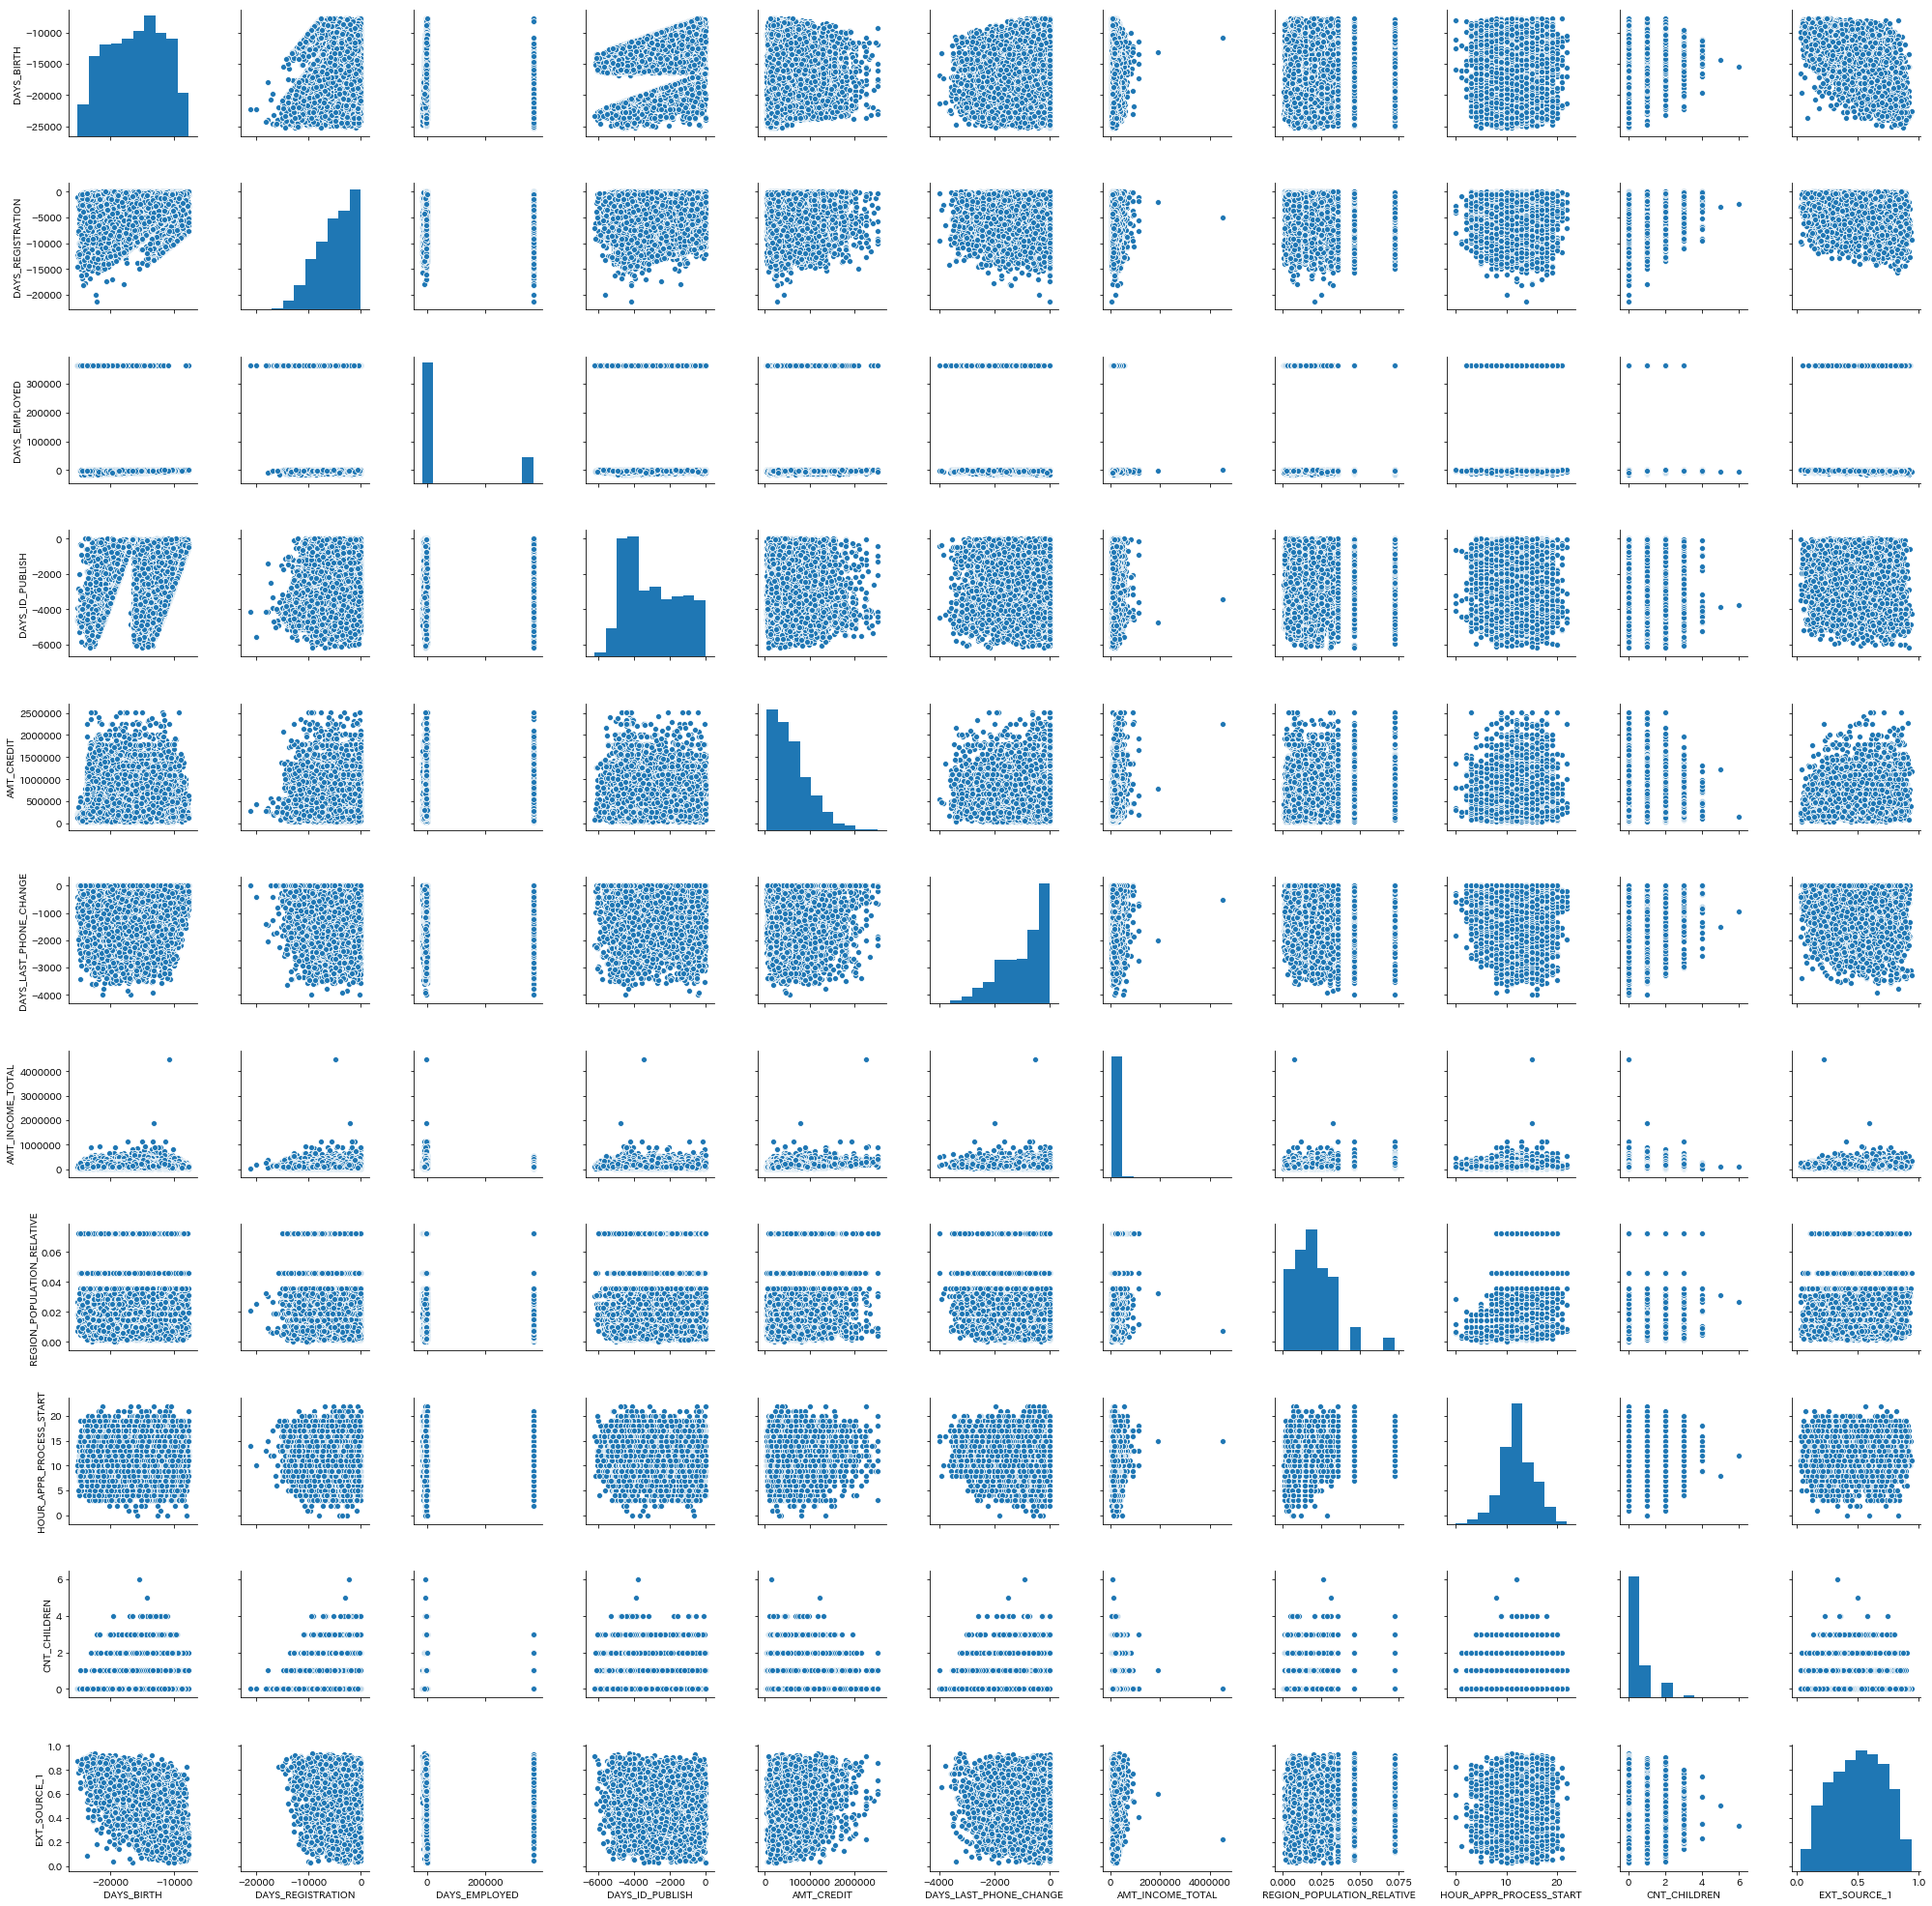

In [31]:
sns.pairplot(df_sa[names])

- 誕生日が確かに若干相関してそう。
- DAYS_EMPLOYEDが変な感じだから詳しく見てみる。

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


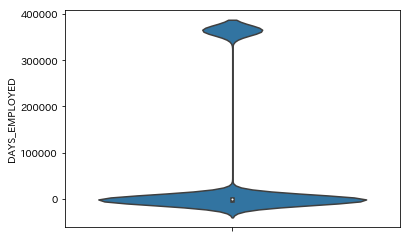

In [32]:
sns.violinplot(y=df.DAYS_EMPLOYED)

とても変な形だから２つに分けて見てみる。

In [33]:
print(df[df.DAYS_EMPLOYED>100000].DAYS_EMPLOYED.value_counts())
print('大きい数字は全て同じ値')

365243    55374
Name: DAYS_EMPLOYED, dtype: int64
大きい数字は全て同じ値


In [34]:
# 残りの数字
df[df.DAYS_EMPLOYED<100000].DAYS_EMPLOYED.describe()

count   252137.000
mean     -2384.169
std       2338.360
min     -17912.000
25%      -3175.000
50%      -1648.000
75%       -767.000
max          0.000
Name: DAYS_EMPLOYED, dtype: float64

- 残りの数字は全てマイナス。
- 何日前に働いたかという数字なので、マイナスで計算しているのが普通
- 大きい数字はまた別の意味がある
- Nan的な意味か、もしくは働いていないか等考えられる。
- 少なくとも分けて考える必要がある。

In [35]:
df.DAYS_EMPLOYED.isnull().sum()

0

null値は無いので、やはりnull的な意味がありそう

In [36]:
# 数字が大きい人の職業状態
df[df.DAYS_EMPLOYED>100000].OCCUPATION_TYPE

8         NaN
11        NaN
23        NaN
38        NaN
43        NaN
46        NaN
54        NaN
56        NaN
62        NaN
79        NaN
81        NaN
84        NaN
99        NaN
105       NaN
106       NaN
108       NaN
117       NaN
118       NaN
125       NaN
140       NaN
143       NaN
156       NaN
157       NaN
158       NaN
173       NaN
174       NaN
175       NaN
185       NaN
213       NaN
220       NaN
         ... 
307369    NaN
307370    NaN
307386    NaN
307390    NaN
307392    NaN
307393    NaN
307398    NaN
307401    NaN
307402    NaN
307404    NaN
307405    NaN
307406    NaN
307417    NaN
307420    NaN
307422    NaN
307424    NaN
307426    NaN
307430    NaN
307433    NaN
307434    NaN
307441    NaN
307443    NaN
307445    NaN
307450    NaN
307463    NaN
307469    NaN
307483    NaN
307487    NaN
307505    NaN
307507    NaN
Name: OCCUPATION_TYPE, Length: 55374, dtype: object

全て欠損値となっているのでやはり無職の人はDAYS_EMPLOYEDが365243として登録されている。と思う。

## DAYS_EMPLOYEDが365243の人は値を全て別の値に変換して、更に別の列でフラグを立てる。

In [119]:
# 条件通りの人は全て１に(1は存在していなかったから)して、musyokuフラグを立てた。
df['DAYS_EMPLOYED'] = df.DAYS_EMPLOYED.mask(df.DAYS_EMPLOYED == 365243,other = 1)
df['musyoku'] = df.DAYS_EMPLOYED == 1
df

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   1            1             1   
1           100003       0                   1            2             1   
2           100004       0                   2            1             2   
3           100006       0                   1            2             1   
4           100007       0                   1            1             1   
5           100008       0                   1            1             1   
6           100009       0                   1            2             2   
7           100010       0                   1            1             2   
8           100011       0                   1            2             1   
9           100012       0                   2            1             1   
10          100014       0                   1            2             1   
11          100015       0                   1            2             1   
12          100016       0                   1            2             1   
13          100017       0                   1            1             2   
14          100018       0                   1            2             1   
15          100019       0                   1            1             2   
16          100020       0                   1            1             1   
17          100021       0                   2            2             1   
18          100022       0                   2            2             1   
19          100023       0                   1            2             1   
20          100024       0                   2            1             2   
21          100025       0                   1            2             2   
22          100026       0                   1            2             1   
23          100027       0                   1            2             1   
24          100029       0                   1            1             2   
25          100030       0                   1            2             1   
26          100031       1                   1            2             1   
27          100032       0                   1            1             1   
28          100033       0                   1            1             2   
29          100034       0                   2            1             1   
...            ...     ...                 ...          ...           ...   
307481      456225       1                   1            1             1   
307482      456226       0                   1            2             2   
307483      456227       0                   1            2             1   
307484      456228       0                   1            2             2   
307485      456229       0                   2            2             1   
307486      456230       0                   1            2             2   
307487      456231       0                   1            1             1   
307488      456232       0                   1            2             1   
307489      456233       1                   1            2             1   
307490      456234       0                   1            1             1   
307491      456235       0                   1            1             2   
307492      456236       0                   1            1             2   
307493      456237       0                   1            2             1   
307494      456238       0                   1            1             2   
307495      456239       0                   1            1             2   
307496      456240       0                   2            2             1   
307497      456241       0                   1            2             2   
307498      456242       0                   1            1             2   
307499      456243       0                   1            2             1   
307500      456244       0                   1            2             1   
3075

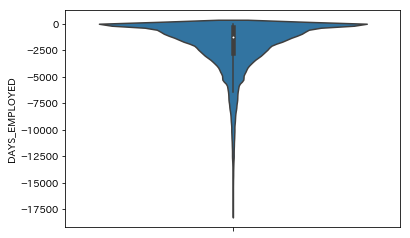

In [38]:
# 可視化
sns.violinplot(y=df.DAYS_EMPLOYED)

治った

# EXT_SOURCE_1を予測した値を代入したデータを使って予測してみる。

In [125]:
# ３００個以上欠損ある列削除した
df = pd.concat([df.dropna(thresh=len(df)-300,axis=1),df.EXT_SOURCE_1],axis=1)

# まずは平均で埋めたデータを使って予測した場合の精度

In [126]:
# カテゴリを全て数字に変換
df = ce_ohe.fit_transform(df)
df = df.fillna(df.mean()) # 平均で埋める
df

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           100002       1                   1            1             1   
1           100003       0                   1            2             1   
2           100004       0                   2            1             2   
3           100006       0                   1            2             1   
4           100007       0                   1            1             1   
5           100008       0                   1            1             1   
6           100009       0                   1            2             2   
7           100010       0                   1            1             2   
8           100011       0                   1            2             1   
9           100012       0                   2            1             1   
10          100014       0                   1            2             1   
11          100015       0                   1            2             1   
12          100016       0                   1            2             1   
13          100017       0                   1            1             2   
14          100018       0                   1            2             1   
15          100019       0                   1            1             2   
16          100020       0                   1            1             1   
17          100021       0                   2            2             1   
18          100022       0                   2            2             1   
19          100023       0                   1            2             1   
20          100024       0                   2            1             2   
21          100025       0                   1            2             2   
22          100026       0                   1            2             1   
23          100027       0                   1            2             1   
24          100029       0                   1            1             2   
25          100030       0                   1            2             1   
26          100031       1                   1            2             1   
27          100032       0                   1            1             1   
28          100033       0                   1            1             2   
29          100034       0                   2            1             1   
...            ...     ...                 ...          ...           ...   
307481      456225       1                   1            1             1   
307482      456226       0                   1            2             2   
307483      456227       0                   1            2             1   
307484      456228       0                   1            2             2   
307485      456229       0                   2            2             1   
307486      456230       0                   1            2             2   
307487      456231       0                   1            1             1   
307488      456232       0                   1            2             1   
307489      456233       1                   1            2             1   
307490      456234       0                   1            1             1   
307491      456235       0                   1            1             2   
307492      456236       0                   1            1             2   
307493      456237       0                   1            2             1   
307494      456238       0                   1            1             2   
307495      456239       0                   1            1             2   
307496      456240       0                   2            2             1   
307497      456241       0                   1            2             2   
307498      456242       0                   1            1             2   
307499      456243       0                   1            2             1   
307500      456244       0                   1            2             1   
3075

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


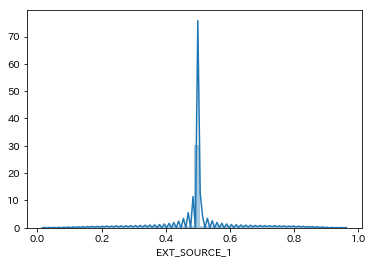

In [127]:
sns.distplot(df.EXT_SOURCE_1)

平均で埋めてるから変な形

In [97]:
# ｘとyで分ける
train_x = df.drop(['SK_ID_CURR','TARGET'],axis=1)
train_y = df['TARGET']

In [98]:
# パラメタなどは決めずそのままクロスバリデーション
# 不均衡データなのでclass_weightだけ指定する
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=0,class_weight='balanced')
scores = cross_val_score(randomforest,train_x,train_y,)
scores


/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The def

array([0.91895926, 0.91899828, 0.91880238])

In [99]:
randomforest = RandomForestClassifier(random_state=0,class_weight='balanced')
randomforest.fit(train_x,train_y)

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

<function matplotlib.pyplot.show(*args, **kw)>

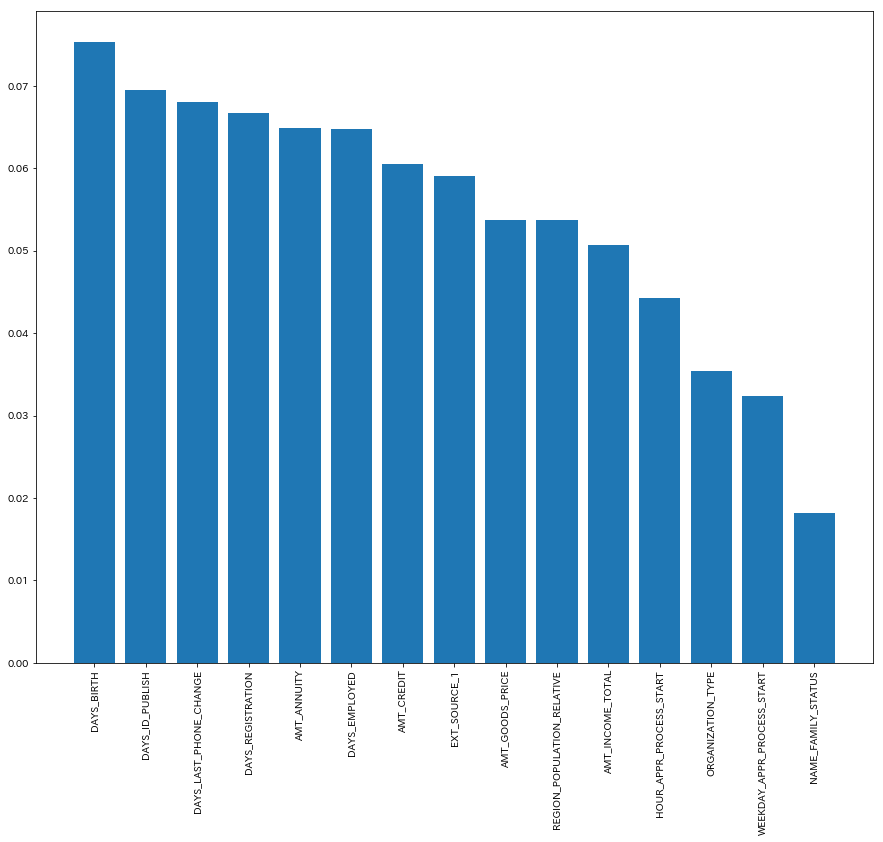

In [100]:
importances = randomforest.feature_importances_
#可視化トップ１５を
indices = np.argsort(importances)[::-1]

names = [train_x.columns[i] for i in indices[:15]]

plt.figure(figsize=(15,12))
plt.bar(range(15),importances[indices[:15]])
plt.xticks(range(15),names,rotation=90)
plt.show

# ランダムフォレストでEXT_SOURCE_1を予測して埋めてから再度予測

In [102]:
# データの読み込み直し
df = pd.read_csv('application_train.csv')
df = pd.concat([df.dropna(thresh=len(df)-300,axis=1),df.EXT_SOURCE_1],axis=1)

In [103]:
# EXTがnanかどうかでデータを分けた
df_E_n = df[np.isnan(df.EXT_SOURCE_1)]
df_E_a = df[np.isnan(df.EXT_SOURCE_1) == 0]

In [118]:
# EXTを目的変数としてxとyに分ける、TARGETも説明変数から外した
train_x = df_E_a.dropna().drop(['SK_ID_CURR','TARGET','EXT_SOURCE_1'],axis=1)
train_y = df_E_a.dropna()['EXT_SOURCE_1']

In [105]:
# ワンホットではなく普通にカテゴリを数値に変換するだけなので列が増えない。
ce_ohe = ce.OrdinalEncoder()
train_x =ce_ohe.fit_transform(train_x)

In [106]:
randamforest = RandomForestRegressor(random_state=0,n_jobs=-1)
# 学習
model1= randamforest.fit(train_x, train_y)

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [107]:
# EXTがnanのデータを予測すべきpred_xとして設定
pred_x = df_E_n.drop(['SK_ID_CURR','TARGET','EXT_SOURCE_1'],axis=1).dropna()
pred_x

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
5              Cash loans           M            N               Y   
7              Cash loans           M            Y               Y   
9         Revolving loans           M            N               Y   
13             Cash loans           M            Y               N   
16             Cash loans           M            N               N   
17        Revolving loans           F            N               Y   
18        Revolving loans           F            N               Y   
19             Cash loans           F            N               Y   
22             Cash loans           F            N               N   
23             Cash loans           F            N               Y   
24             Cash loans           M            Y               N   
26             Cash loans           F            N               Y   
27             Cash loans           M            N               Y   
30             Cash loans           F            N               Y   
32             Cash loans           F            N               N   
33             Cash loans           M            Y               N   
34             Cash loans           F            N               Y   
35             Cash loans           F            N               N   
38             Cash loans           F            N               Y   
39        Revolving loans           M            Y               Y   
40             Cash loans           M            N               Y   
41             Cash loans           F            N               Y   
43             Cash loans           F            N               Y   
44             Cash loans           M            N               Y   
45        Revolving loans           F            N               Y   
46             Cash loans           F            N               Y   
47             Cash loans           F            N               Y   
...                   ...         ...          ...             ...   
307443         Cash loans           F            N               N   
307446         Cash loans           M            N               N   
307447         Cash loans           F            N               Y   
307451         Cash loans           M            Y               N   
307455         Cash loans           M            N               Y   
307457    Revolving loans           F            N               Y   
307462         Cash loans           F            Y               Y   
307463         Cash loans           F            N               Y   
307465         Cash loans           F            N               N   
307466         Cash loans           F            N               Y   
307469         Cash loans           F            N               Y   
307470         Cash loans           F            N               Y   
307477         Cash loans           F            N               Y   
307480         Cash loans           F            N               N   
307481         Cash loans           M            N               Y   
307483         Cash loans           F            N               Y   
307484         Cash loans           F            Y               N   
307486         Cash loans           F            Y               Y   
307487         Cash loans           M            N               Y   
307489         Cash loans           F            N               Y   
307492         Cash loans           M            Y               Y   
307493         Cash loans           F            N               Y   
307495         Cash loans           M            Y               N   
307498         Cash loans           M            Y               Y   
307501         Cash loans           F            N               Y   
307502         Ca

In [108]:
# pred_xをカテゴリカル変数から全て変更して、先程のmodel1を使って予測して代入
pred_x =ce_ohe.fit_transform(pred_x)
pred_x['EXT_SOURCE_1'] = model1.predict(pred_x)
pred_x

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
2                        2            1             2                1   
3                        1            2             1                1   
4                        1            1             1                1   
5                        1            1             1                1   
7                        1            1             2                1   
9                        2            1             1                1   
13                       1            1             2                2   
16                       1            1             1                2   
17                       2            2             1                1   
18                       2            2             1                1   
19                       1            2             1                1   
22                       1            2             1                2   
23                       1            2             1                1   
24                       1            1             2                2   
26                       1            2             1                1   
27                       1            1             1                1   
30                       1            2             1                1   
32                       1            2             1                2   
33                       1            1             2                2   
34                       1            2             1                1   
35                       1            2             1                2   
38                       1            2             1                1   
39                       2            1             2                1   
40                       1            1             1                1   
41                       1            2             1                1   
43                       1            2             1                1   
44                       1            1             1                1   
45                       2            2             1                1   
46                       1            2             1                1   
47                       1            2             1                1   
...                    ...          ...           ...              ...   
307443                   1            2             1                2   
307446                   1            1             1                2   
307447                   1            2             1                1   
307451                   1            1             2                2   
307455                   1            1             1                1   
307457                   2            2             1                1   
307462                   1            2             2                1   
307463                   1            2             1                1   
307465                   1            2             1                2   
307466                   1            2             1                1   
307469                   1            2             1                1   
307470                   1            2             1                1   
307477                   1            2             1                1   
307480                   1            2             1                2   
307481                   1            1             1                1   
307483                   1            2             1                1   
307484                   1            2             2                2   
307486                   1            2             2                1   
307487                   1            1             1                1   
307489                   1            2             1                1   
307492                   1            1             2                1   
307493                   1            2             1                1   
307495      

In [109]:
#元から埋まっていたデータと結合する。
df_fill_E1 = pd.concat([df_E_a.drop(['SK_ID_CURR','TARGET'],axis=1),pred_x]).sort_index()
df_fill_E1 = pd.merge(df_fill_E1,df[['TARGET']],left_index=True,right_index=True)
df_fill_E1

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2                       2           1            2               1   
3                       1           2            1               1   
4                       1           1            1               1   
5                       1           1            1               1   
6              Cash loans           F            Y               Y   
7                       1           1            2               1   
8              Cash loans           F            N               Y   
9                       2           1            1               1   
10             Cash loans           F            N               Y   
11             Cash loans           F            N               Y   
12             Cash loans           F            N               Y   
13                      1           1            2               2   
14             Cash loans           F            N               Y   
15             Cash loans           M            Y               Y   
16                      1           1            1               2   
17                      2           2            1               1   
18                      2           2            1               1   
19                      1           2            1               1   
20        Revolving loans           M            Y               Y   
21             Cash loans           F            Y               Y   
22                      1           2            1               2   
23                      1           2            1               1   
24                      1           1            2               2   
25             Cash loans           F            N               Y   
26                      1           2            1               1   
27                      1           1            1               1   
28             Cash loans           M            Y               Y   
29        Revolving loans           M            N               Y   
...                   ...         ...          ...             ...   
307481                  1           1            1               1   
307482         Cash loans           F            Y               Y   
307483                  1           2            1               1   
307484                  1           2            2               2   
307485    Revolving loans           F            N               Y   
307486                  1           2            2               1   
307487                  1           1            1               1   
307488         Cash loans           F            N               N   
307489                  1           2            1               1   
307490         Cash loans           M            N               Y   
307491         Cash loans           M            Y               Y   
307492                  1           1            2               1   
307493                  1           2            1               1   
307494         Cash loans           M            Y               N   
307495                  1           1            2               2   
307496    Revolving loans           F            N               N   
307497         Cash loans           F            Y               Y   
307498                  1           1            2               1   
307499         Cash loans           F            N               Y   
307500         Cash loans           F            N               Y   
307501                  1           2            1               1   
307502                  1           2            1               1   
307503         Cash loans           F            N               Y   
307504                  1           2            1               1   
307505                  1           2            1               1   
307506         Ca

In [110]:
# EXTが埋められたデータを使って学習、予測してみる。
train_x = df_fill_E1.dropna().drop('TARGET',axis=1)
train_y = df_fill_E1.dropna()['TARGET']
train_x = ce_ohe.fit_transform(train_x)

In [111]:
from sklearn.model_selection import cross_val_score
randomforest = RandomForestClassifier(random_state=0,class_weight='balanced')
scores = cross_val_score(randomforest,train_x,train_y)
scores

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The def

array([0.91872626, 0.91880438, 0.918745  ])

In [112]:
randomforest = RandomForestClassifier(random_state=0,class_weight='balanced')
randomforest.fit(train_x,train_y)

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

<function matplotlib.pyplot.show(*args, **kw)>

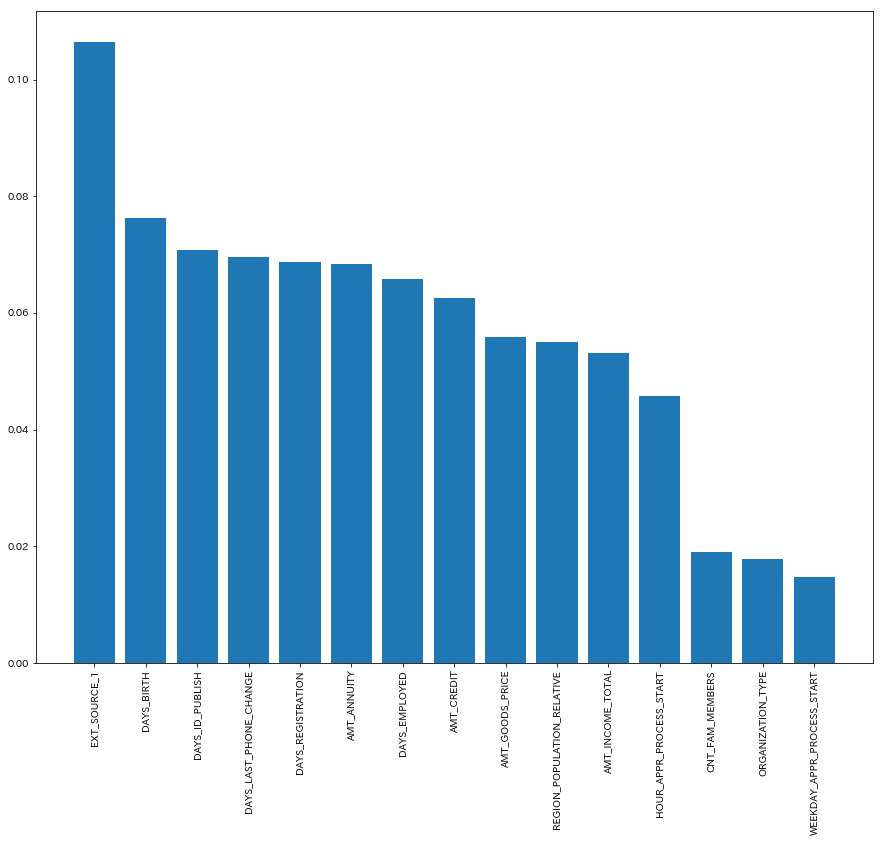

In [113]:
importances = randomforest.feature_importances_
#可視化トップ１５を
indices = np.argsort(importances)[::-1]

names = [train_x.columns[i] for i in indices[:15]]

plt.figure(figsize=(15,12))
plt.bar(range(15),importances[indices[:15]])
plt.xticks(range(15),names,rotation=90)
plt.show

/Users/takahashiakira/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


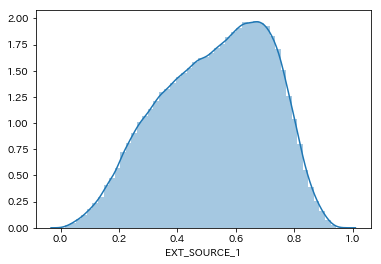

In [59]:
sns.distplot(df_fill_E1.EXT_SOURCE_1)

- 精度下がった。。。
- 平均で全て埋めた時はEXT_SOURCE1が使い物にならないからかターゲットを予測する際の重要度は一番関連が強いDAY_BIRTHになっていた。
- DAY_BIRTHでEXTが予測できるからかわからないが、とにかく精度は上がらなかった。。。

EDAの出口がわからなくなったので、ココらへんで終了させる。